This notebook contains SI Figures.

In [1]:
# General imports
import pandas as pd
fname = '../../data/brain-lang-data_participant_20230728.csv'
df = pd.read_csv(fname)

save = False
PLOTDIR = None # Where to store plots
CSVDIR = None # Where to store accompanying CSV files

## SI 4

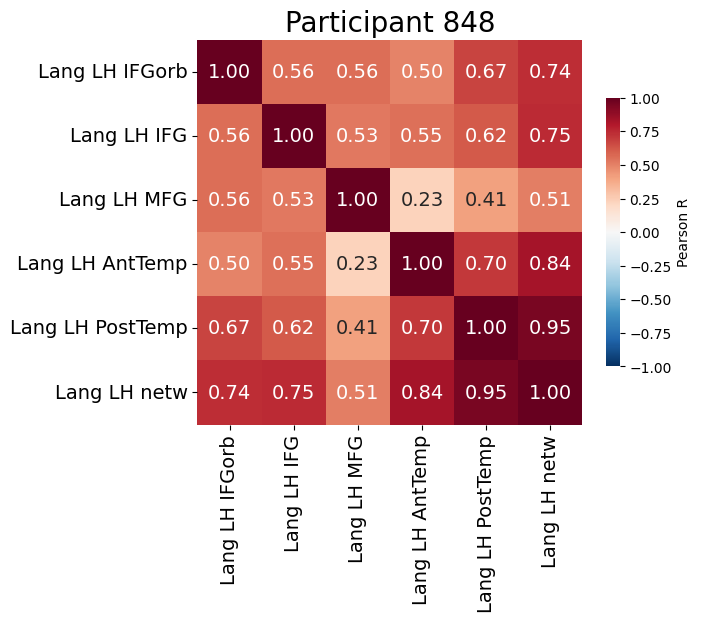

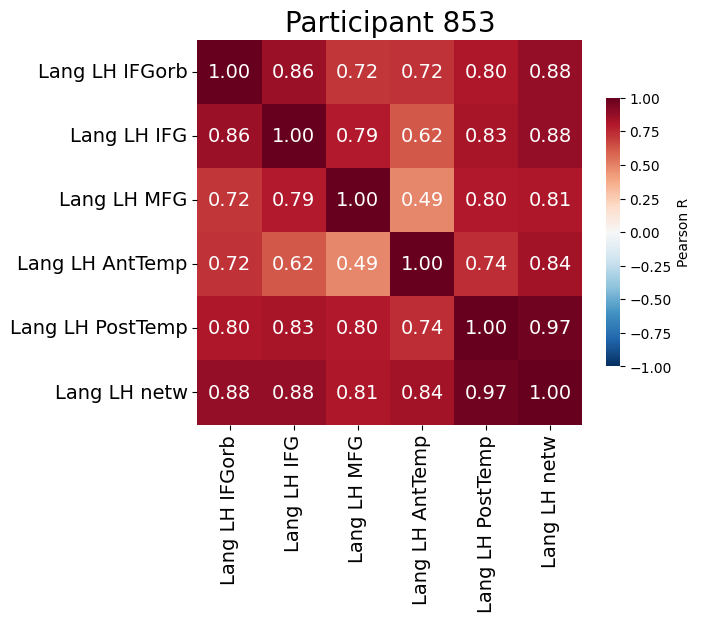

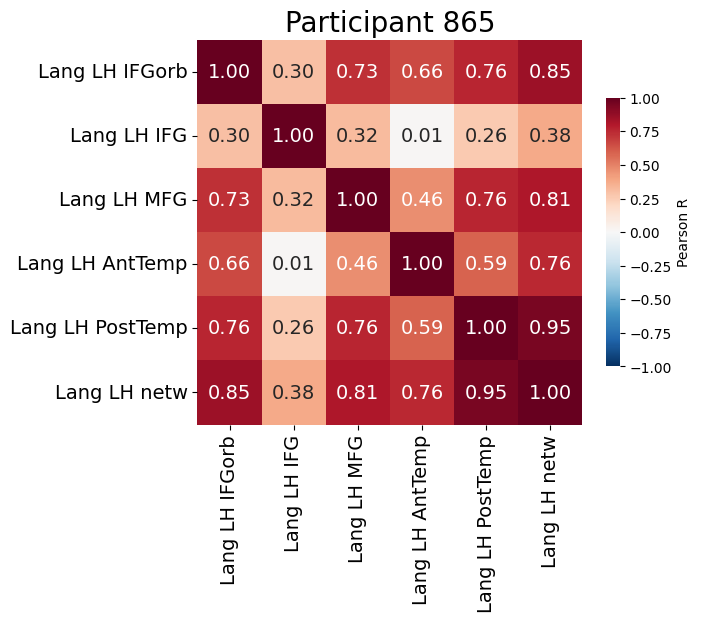

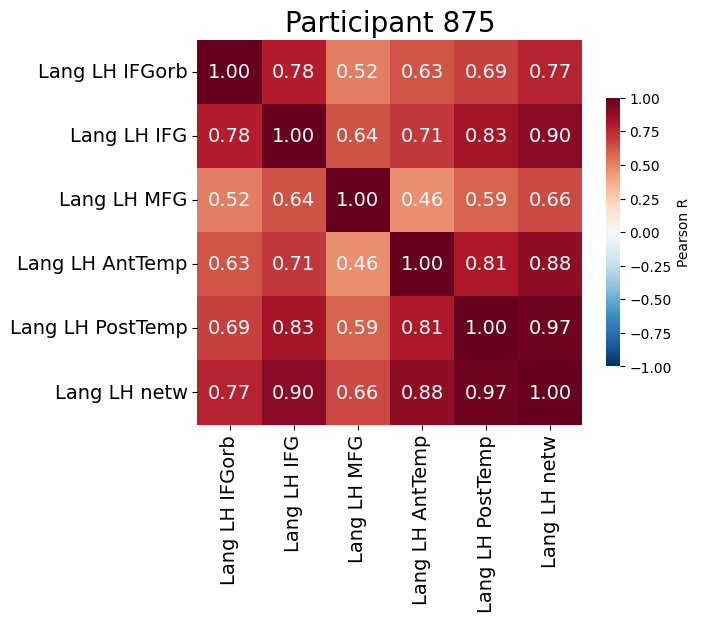

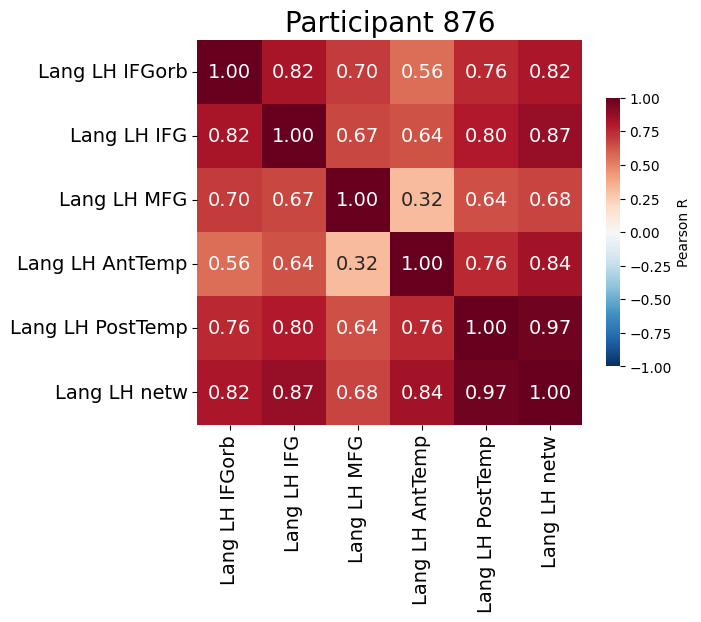

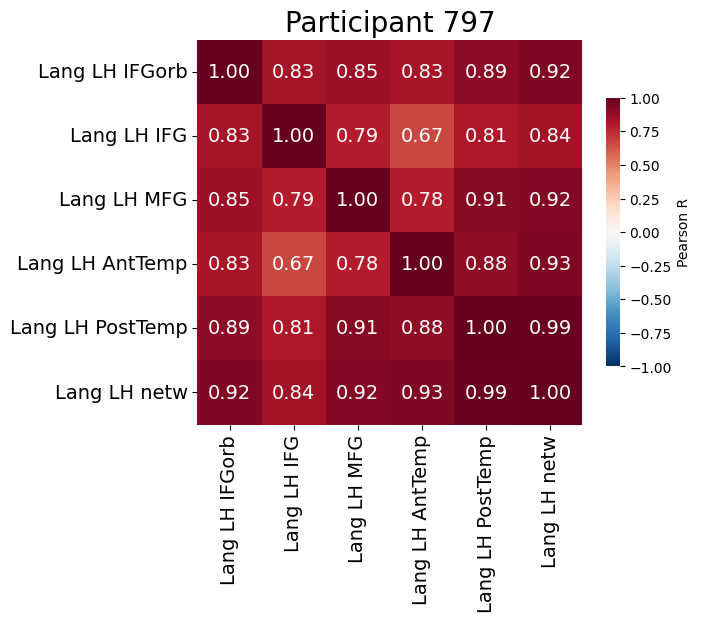

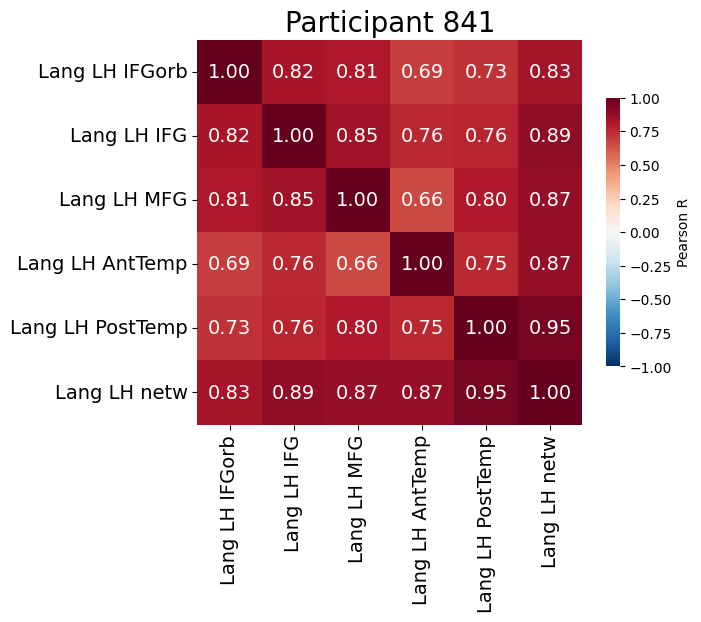

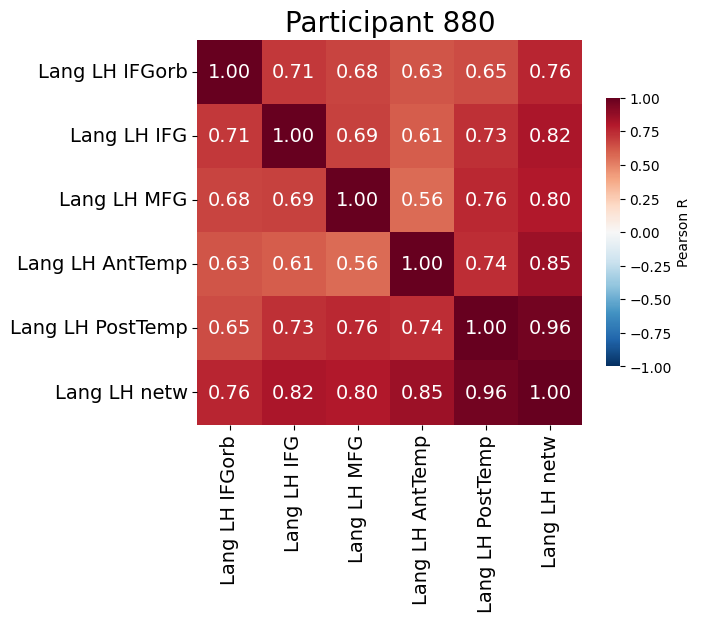

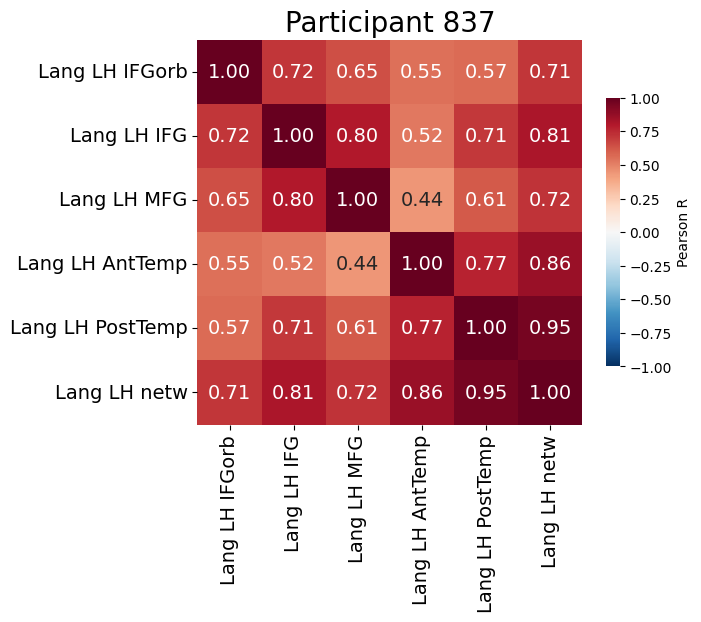

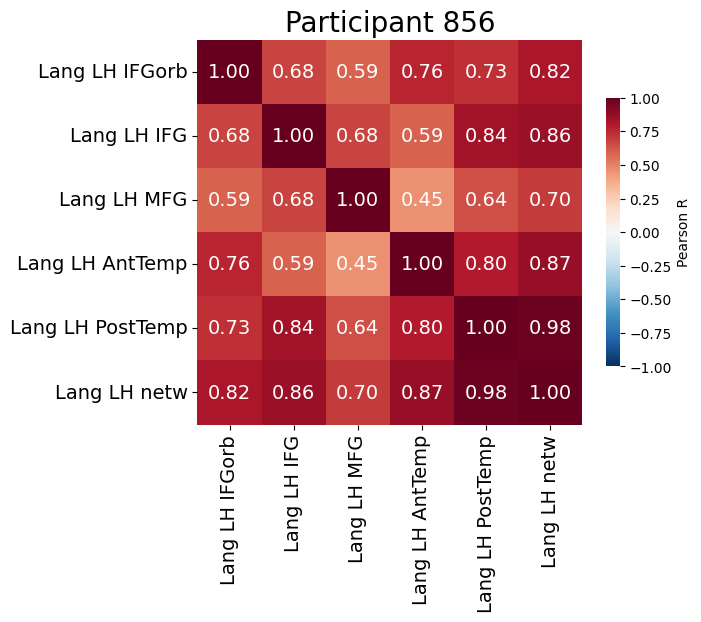

In [81]:
UIDs = [848, 853, 865, 875, 876, 797, 841, 880, 837, 856]
from resources import lang_LH_rois
from plot_utils import heatmap

for UID in UIDs:

    df_UID = df.query(f'target_UID == {UID}')
    
    # Generate a pivot table of item x ROI
    df_UID_piv = df_UID.pivot(index='item_id', columns='roi', values='response_target')
    
    # Reorder the ROI columns
    df_UID_piv = df_UID_piv[lang_LH_rois]

    heatmap(df_corr=df_UID_piv.corr(),
		figsize=(7,7),
		vmax=1, vmin=-1,
		center=0,
		annot=True,
		title=f'Participant {UID}',
		pretty_roi_labels=True,
		save=save,
		savestr=f'SI_Fig4_{UID}',
		PLOTDIR=PLOTDIR, CSVDIR=CSVDIR)

## SI 6

Cross-validated LLM performance across layers on the set of n=5 train participants. These scores were obtained using [/src/run_analyses/fit_mapping.py](https://github.com/gretatuckute/drive_suppress_brains/blob/main/src/run_analyses/fit_mapping.py).

In [2]:
fname_cv = '../../data_SI/SI6-CV-kfold-data.csv'
df_cv = pd.read_csv(fname_cv, index_col=0)
from plot_utils import val_across_layers

## SI Figure 6A

Cross-validated GPT2-XL performance across layers using last-token GPT2-XL representations. 

['lang_LH_netw']
Plotting val-across-layers_VAL=CV_score_mean_ERR=CV_score_sem_yl=(0, 0.7)_NC=True_layers-n=49_848-853-865-875-876_lang_LH_netw_SI_Fig6A
Unique layers: 49 and unique ROIs: 1
Yields 49 rows



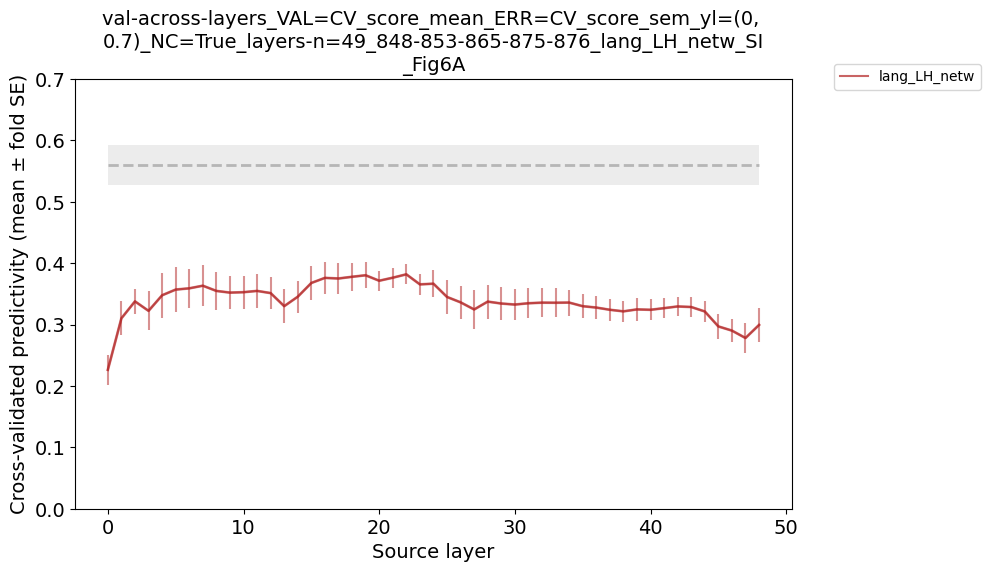

In [4]:
val_across_layers(df=df_cv.query('source_model == "gpt2-xl" and sent_embed == "last-tok"'),
                    val='CV_score_mean',
                    rois_of_interest='lang_LH_netw', 
                    add_NC=True,
                    save=save,
                    base_savestr='SI_Fig6A',
                    add_savestr='',
                    ylim=(0, 0.7),
                    PLOTDIR=PLOTDIR, CSVDIR=CSVDIR, )

## SI Figure 6B

Cross-validated GPT2-XL performance across layers using average token GPT2-XL representations.

['lang_LH_netw']
Plotting val-across-layers_VAL=CV_score_mean_ERR=CV_score_sem_yl=(0, 0.7)_NC=True_layers-n=49_848-853-865-875-876_lang_LH_netw_SI_Fig6B
Unique layers: 49 and unique ROIs: 1
Yields 49 rows



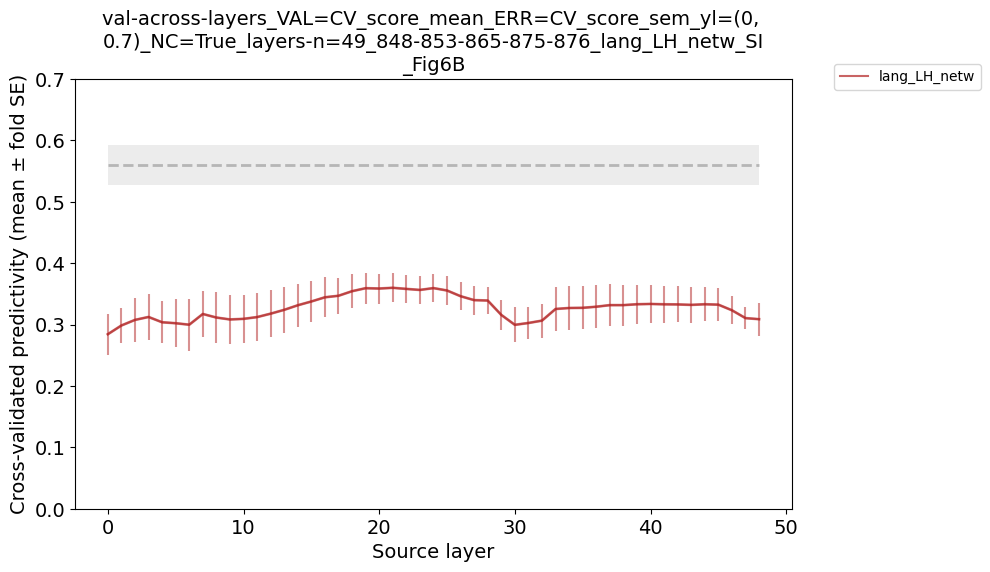

In [5]:
val_across_layers(df=df_cv.query('source_model == "gpt2-xl" and sent_embed == "mean-tok"'),
                    val='CV_score_mean',
                    rois_of_interest='lang_LH_netw', 
                    add_NC=True,
                    save=save,
                    base_savestr='SI_Fig6B',
                    add_savestr='',
                    ylim=(0, 0.7),
                    PLOTDIR=PLOTDIR, CSVDIR=CSVDIR, )

## SI Figure 6C

Cross-validated BERT-large performance across layers using two different token representations (first token: CLS, or last token: SEP).

['lang_LH_netw']
Plotting val-across-layers_VAL=CV_score_mean_ERR=CV_score_sem_yl=(0, 0.7)_NC=True_layers-n=25_848-853-865-875-876_lang_LH_netw_SI_Fig6C_first-tok
Unique layers: 25 and unique ROIs: 1
Yields 25 rows



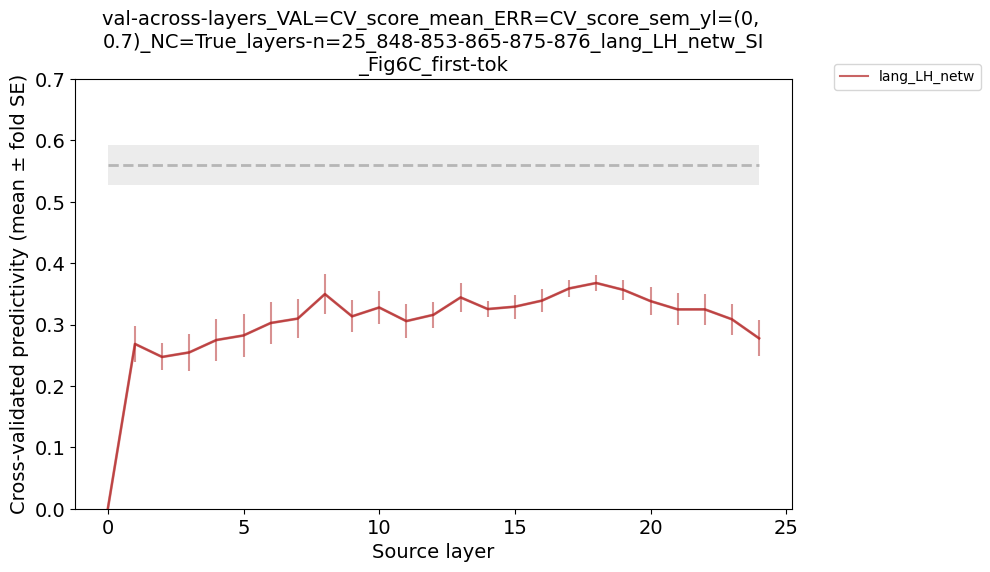

In [6]:
val_across_layers(df=df_cv.query('source_model == "bert-large-cased" and sent_embed == "first-tok"'),
                    val='CV_score_mean',
                    rois_of_interest='lang_LH_netw', 
                    add_NC=True,
                    save=save,
                    base_savestr='SI_Fig6C_first-tok',
                    add_savestr='',
                    ylim=(0, 0.7),
                    PLOTDIR=PLOTDIR, CSVDIR=CSVDIR, )

['lang_LH_netw']
Plotting val-across-layers_VAL=CV_score_mean_ERR=CV_score_sem_yl=(0, 0.7)_NC=True_layers-n=25_848-853-865-875-876_lang_LH_netw_SI_Fig6C_last-tok
Unique layers: 25 and unique ROIs: 1
Yields 25 rows



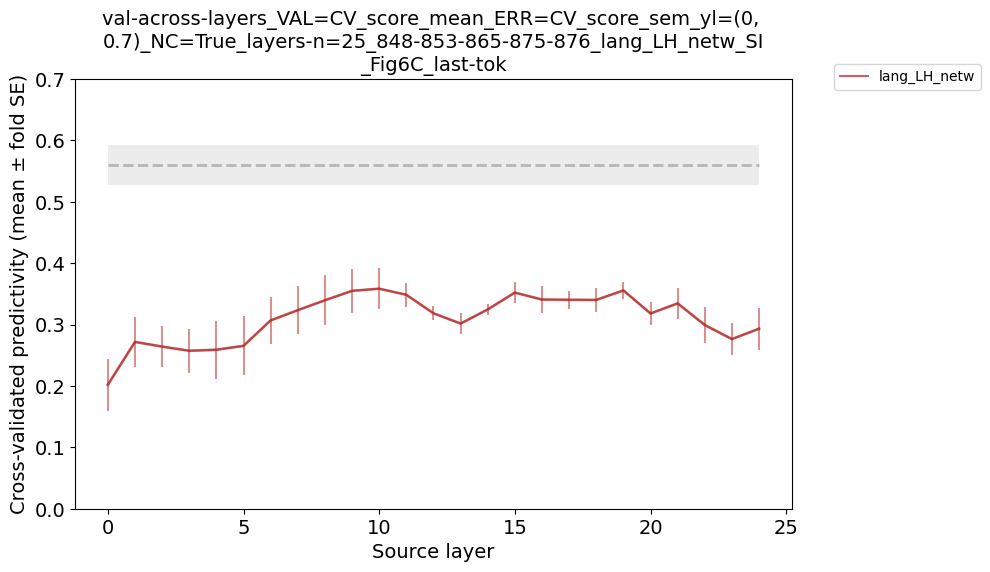

In [7]:
val_across_layers(df=df_cv.query('source_model == "bert-large-cased" and sent_embed == "last-tok"'),
                    val='CV_score_mean',
                    rois_of_interest='lang_LH_netw', 
                    add_NC=True,
                    save=save,
                    base_savestr='SI_Fig6C_last-tok',
                    add_savestr='',
                    ylim=(0, 0.7),
                    PLOTDIR=PLOTDIR, CSVDIR=CSVDIR, )

## SI Figure 6D

Cross-validated GPT2-XL performance across layers using last-token GPT2-XL representations for the anatomically defined language network.

['anatglasser_LH_LangNetw']
Plotting val-across-layers_VAL=CV_score_mean_ERR=CV_score_sem_yl=(0, 0.7)_NC=True_layers-n=49_848-853-865-875-876_anatglasser_LH_LangNetw_SI_Fig6D
Unique layers: 49 and unique ROIs: 1
Yields 49 rows



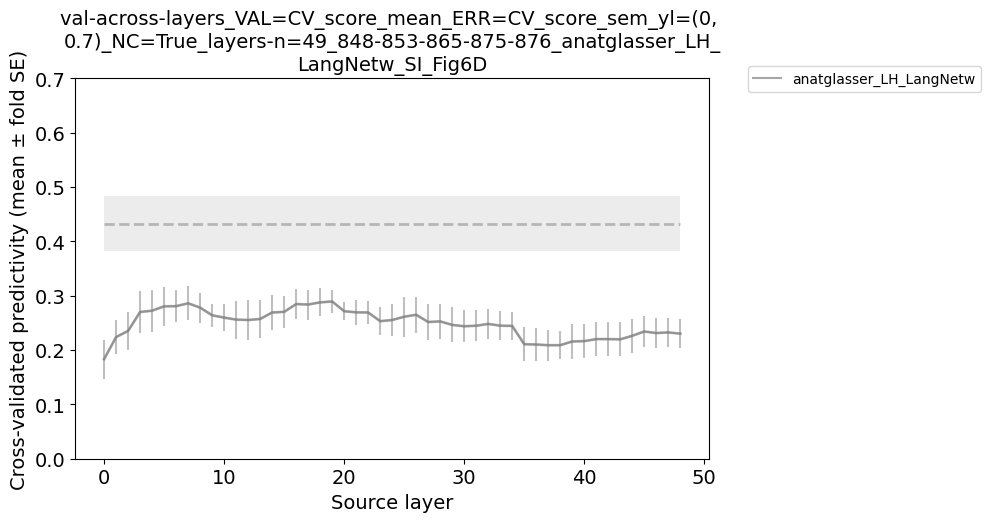

In [8]:
val_across_layers(df=df_cv.query('source_model == "gpt2-xl" and sent_embed == "last-tok"'),
                    val='CV_score_mean',
                    rois_of_interest='anatglasser_LH_LangNetw',
                    add_NC=True,
                    save=save,
                    base_savestr='SI_Fig6D',
                    add_savestr='',
                    ylim=(0, 0.7),
                    PLOTDIR=PLOTDIR, CSVDIR=CSVDIR, )

## SI Figure 7

Held-out participant GPT2-XL performance across layers using last-token GPT2-XL representations. These scores were obtained using [/src/run_analyses/use_mapping.py](https://github.com/gretatuckute/drive_suppress_brains/blob/main/src/run_analyses/use_mapping.py).

In [9]:
from plot_utils import val_across_layers_target_uids
fname_cv_uid = '../../data_SI/SI7-CV-UID-data.csv'
df_cv_uid = pd.read_csv(fname_cv_uid, index_col = 0)

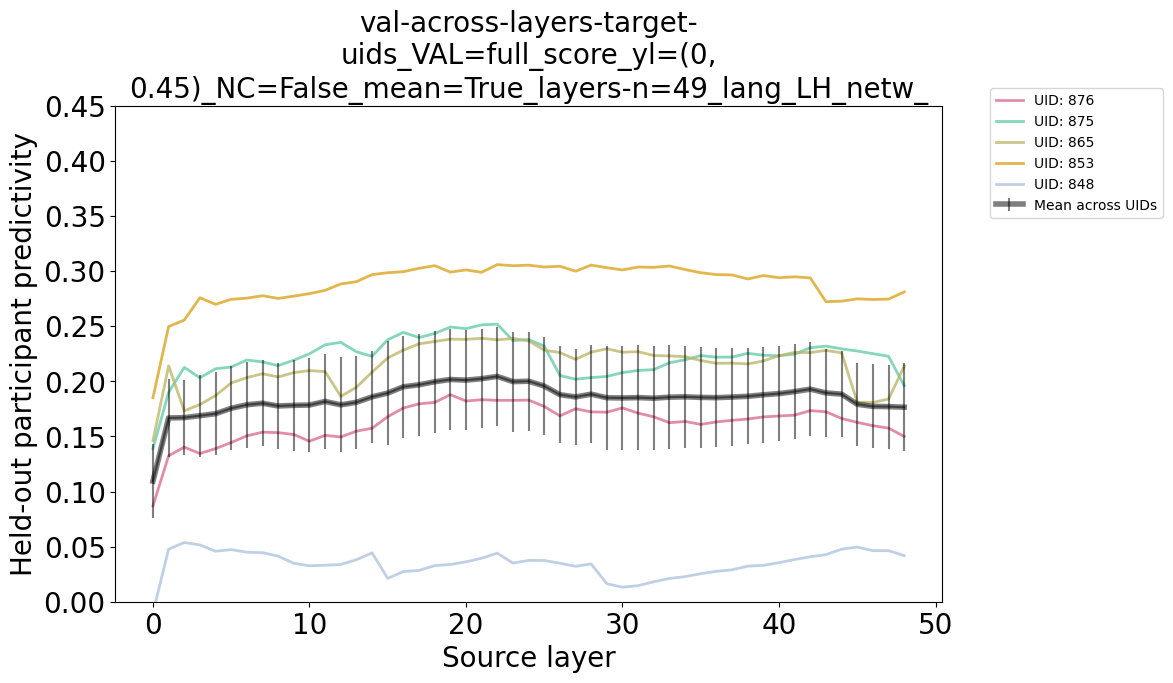

In [10]:
val_across_layers_target_uids(df=df_cv_uid,
                                val='full_score',
                                roi='lang_LH_netw',
                                add_NC=False,
                                add_mean=True,
                                ylim=(0, 0.45),
                                save=save,
                                add_savestr='',
                                PLOTDIR=PLOTDIR, CSVDIR=CSVDIR, )

## SI 8

In [13]:
from plot_utils import CV_vs_NC

## SI Figure 8A

The noise ceiling (NC; y-axis), a measure of stimulus-related response reliability, as a function of encoding model performance (x-axis) across all functionally defined ROIs in the language network (red), multiple demand (MD) network (blue), and the default mode network (DMN; green).

In [14]:
fname_cv_func_rois = '../../data_SI/SI8A-CV-func_ROI-data.csv'
df_cv_func_rois = pd.read_csv(fname_cv_func_rois, index_col=0)

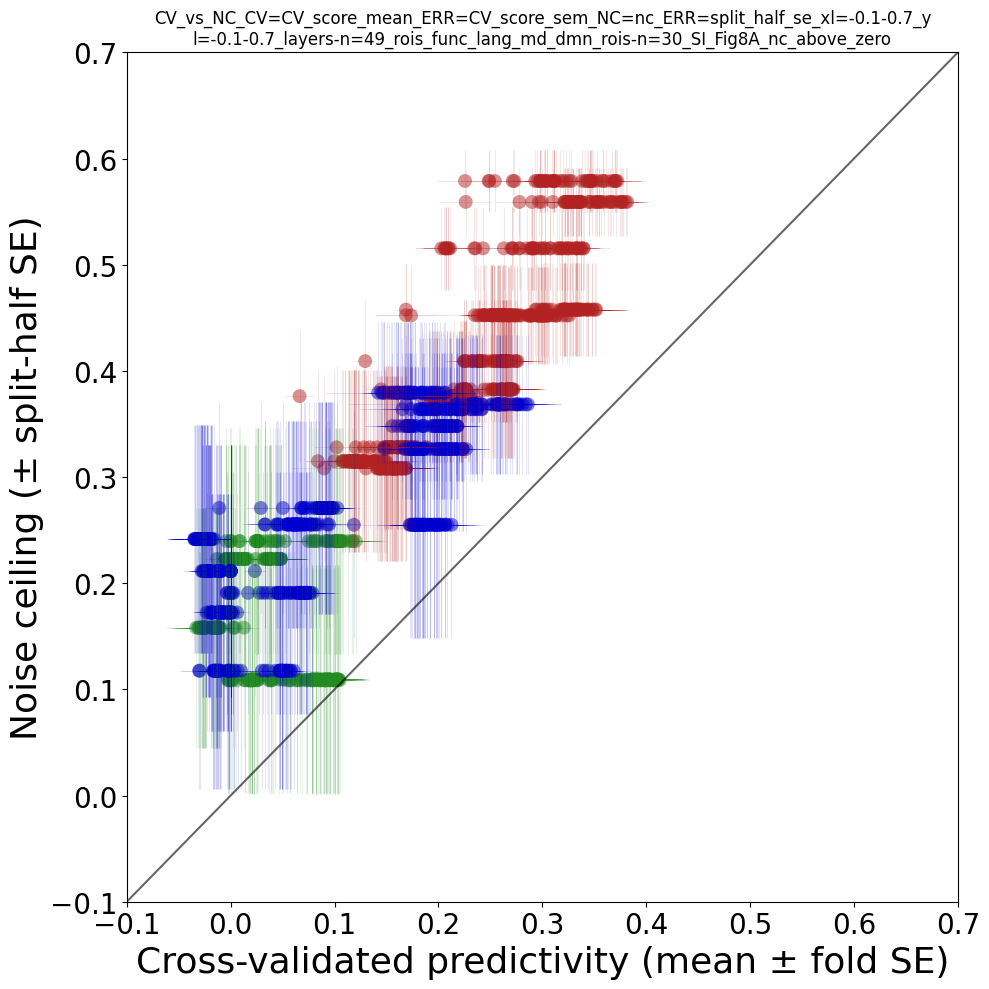

In [15]:
CV_vs_NC(df=df_cv_func_rois,
        cv_col='CV_score_mean',
        cv_err_col='CV_score_sem',
        nc_col='nc',
        nc_err_col='split_half_se',
        rois_of_interest='rois_func_lang_md_dmn',
        source_layer=None,
        save=save,
        base_savestr='SI_Fig8A',
        add_savestr='nc_above_zero',
        xlim=[-0.1, 0.7],
        ylim=[-0.1, 0.7],
        alpha_err=0.2,
        alpha_dot=0.5,
        PLOTDIR=PLOTDIR, CSVDIR=CSVDIR, )

## SI Figure 8C

The NC (y-axis) as a function of encoding model performance (x-axis) for the anatomical ROIs for which the NC reliability did not overlap with zero (189 ROIs in total; the NCs for these ROIs are illustrated in SI Figure 8B).

In [16]:
fname_cv_anat_rois = '../../data_SI/SI8B-CV-anat_ROI-data.csv'
df_cv_anat_rois = pd.read_csv(fname_cv_anat_rois, index_col=0)

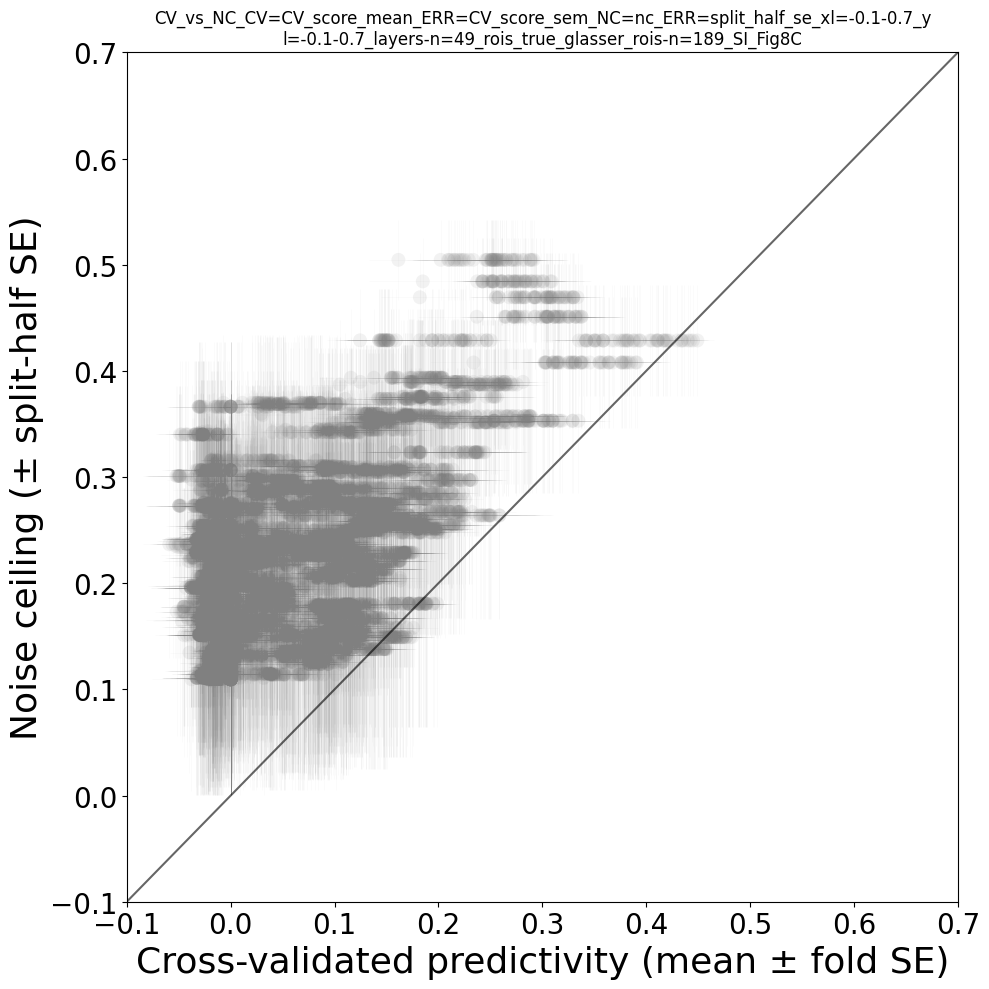

In [17]:
CV_vs_NC(df=df_cv_anat_rois,
        cv_col='CV_score_mean',
        cv_err_col='CV_score_sem',
        nc_col='nc',
        nc_err_col='split_half_se',
        rois_of_interest='rois_true_glasser',
        source_layer=None,
        save=save,
        base_savestr='SI_Fig8C',
        xlim=[-0.1, 0.7],
        ylim=[-0.1, 0.7],
        alpha_err=0.05,
        alpha_dot=0.1,
        PLOTDIR=PLOTDIR, CSVDIR=CSVDIR, )

## SI 11

In [20]:
import sys
sys.path.append("..")
from resources import item_scatter_style
from plot_utils import item_scatter_ngram_cbar, abs_diff_vs_ngram_overlap, ngram_overlap_hist

plot_aspect_flag, add_identity_flag, d_xlim, d_ylim = item_scatter_style(style_setting='wide')
target_UID_flag = ['797', '841', '880']
roi_flag = 'lang_LH_netw'
target_norm = 'bySessVoxZ'
target_UID_flag_str = '-'.join(target_UID_flag)

## SI Figure 11A

Sentence-level brain responses (y-axis) as a function of the predicted responses (x-axis) from Figure 3 in the main text, colored according to the n-gram overlap (unigram, bigram, and trigram in separate subplots).



Plotting: item-scatter-ngram-cbar-T_1gram_overlap_X=encoding_model_pred_Y=response_target_xl=-0.75-0.75_yl=-2-2_mean=True_a=0.8_i=True_797-841-880_lang_LH_netw_SI_Fig10A_T_1gram_overlap
Total number of data points across 3 participants: 4500
Number of items in D and S conds: 500
Min of encoding_model_pred: -0.529797 and max of encoding_model_pred: 0.684224
Min of response_target: -1.347397 and max of response_target: 1.497439


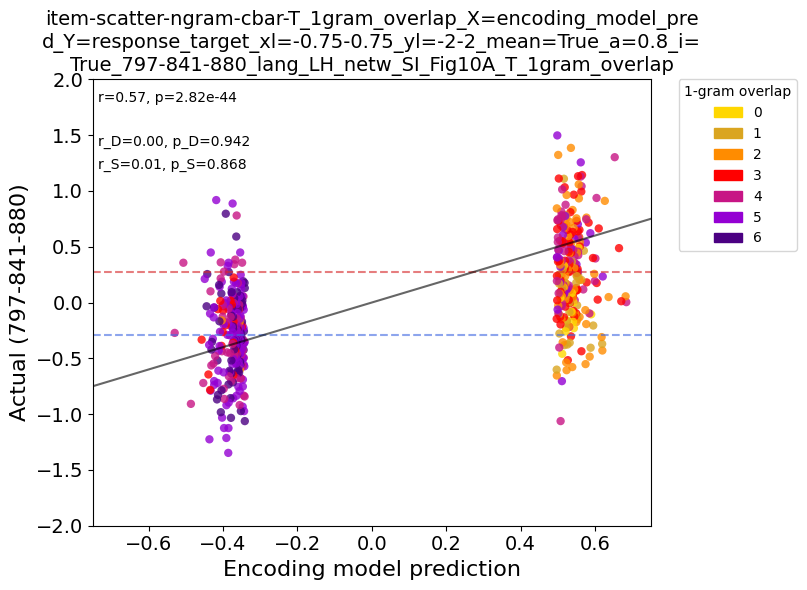



Plotting: item-scatter-ngram-cbar-T_2gram_overlap_X=encoding_model_pred_Y=response_target_xl=-0.75-0.75_yl=-2-2_mean=True_a=0.8_i=True_797-841-880_lang_LH_netw_SI_Fig10A_T_2gram_overlap
Total number of data points across 3 participants: 4500
Number of items in D and S conds: 500
Min of encoding_model_pred: -0.529797 and max of encoding_model_pred: 0.684224
Min of response_target: -1.347397 and max of response_target: 1.497439


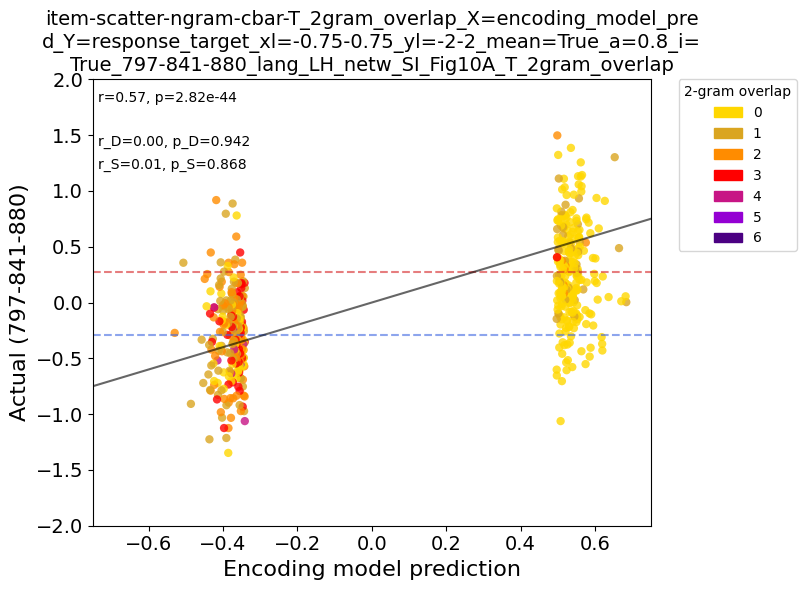



Plotting: item-scatter-ngram-cbar-T_3gram_overlap_X=encoding_model_pred_Y=response_target_xl=-0.75-0.75_yl=-2-2_mean=True_a=0.8_i=True_797-841-880_lang_LH_netw_SI_Fig10A_T_3gram_overlap
Total number of data points across 3 participants: 4500
Number of items in D and S conds: 500
Min of encoding_model_pred: -0.529797 and max of encoding_model_pred: 0.684224
Min of response_target: -1.347397 and max of response_target: 1.497439


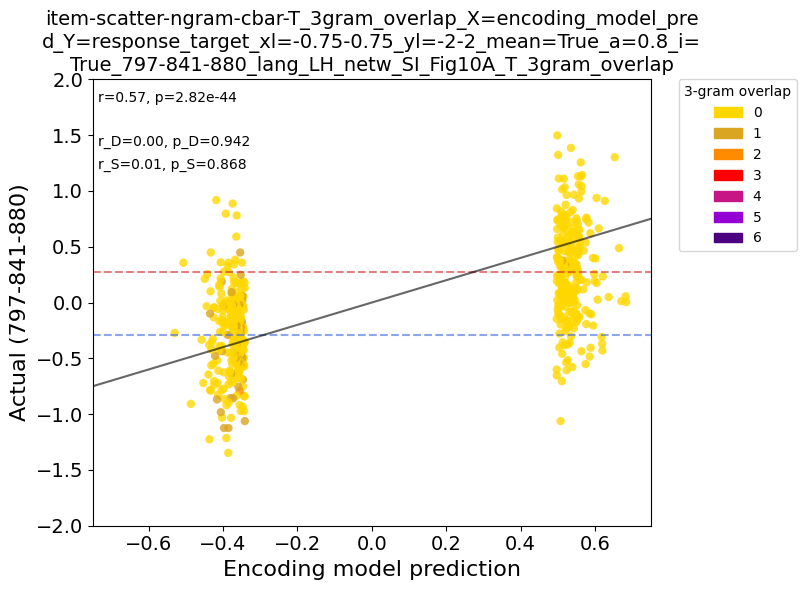

In [21]:
xlim_flag = d_xlim[roi_flag][target_norm][target_UID_flag_str]
ylim_flag = d_ylim[roi_flag][target_norm][target_UID_flag_str]

for ngram_color_col in ['T_1gram_overlap', 'T_2gram_overlap', 'T_3gram_overlap']:

    # Actual versus predicted
    item_scatter_ngram_cbar(df=df,
                             rois_of_interest=roi_flag,
                             target_UIDs=target_UID_flag,
                             x_val='encoding_model_pred',
                             y_val='response_target',
                             add_mean=True,
                             plot_aspect=plot_aspect_flag,
                             add_identity=add_identity_flag,
                             xlim=xlim_flag,
                             ylim=ylim_flag,
                             save=save,
                             base_savestr=f'SI_Fig10A_{ngram_color_col}',
                             add_savestr='',
                             PLOTDIR=PLOTDIR, CSVDIR=CSVDIR,
                             NGRAM_DATADIR='../../data_SI/',
                             NGRAM_fname='SI11_stimset_D-S_light_ngram-overlaps-sentence-level.csv',
                             ngram_color_col=ngram_color_col)


Only using D_search and S_search conditions. Number of items: 500


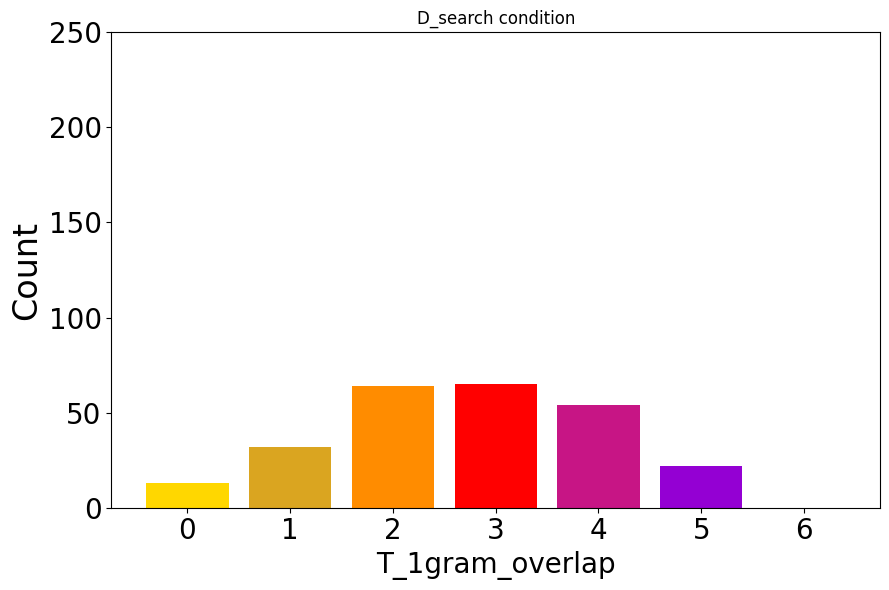

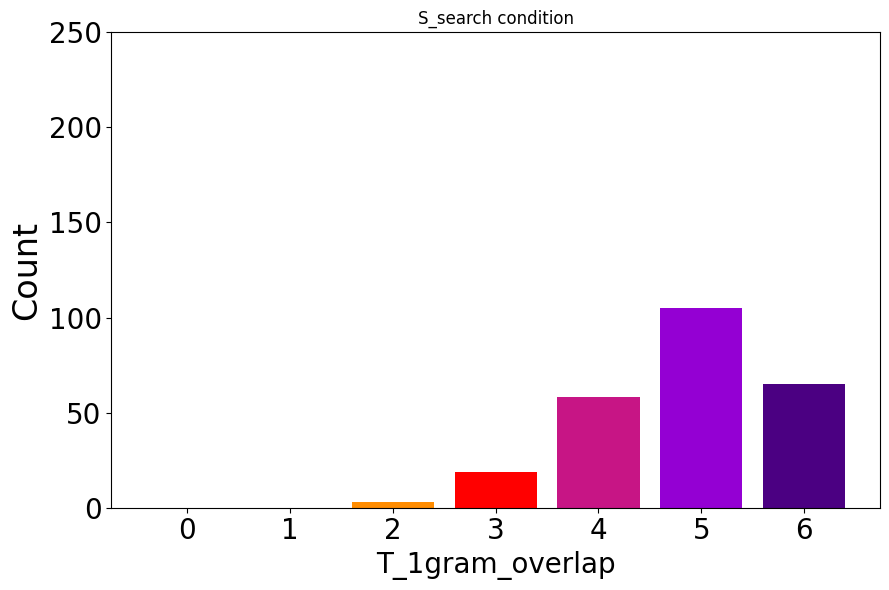

Only using D_search and S_search conditions. Number of items: 500


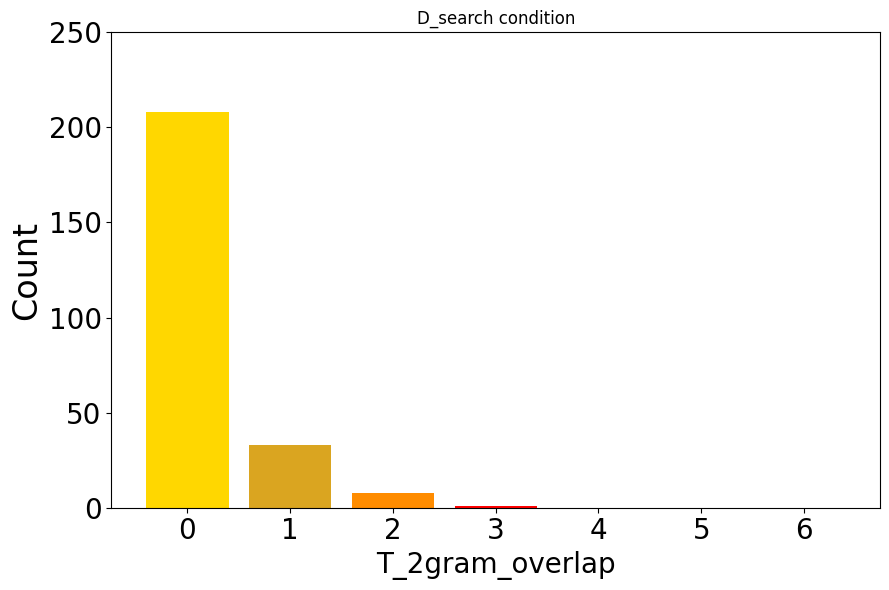

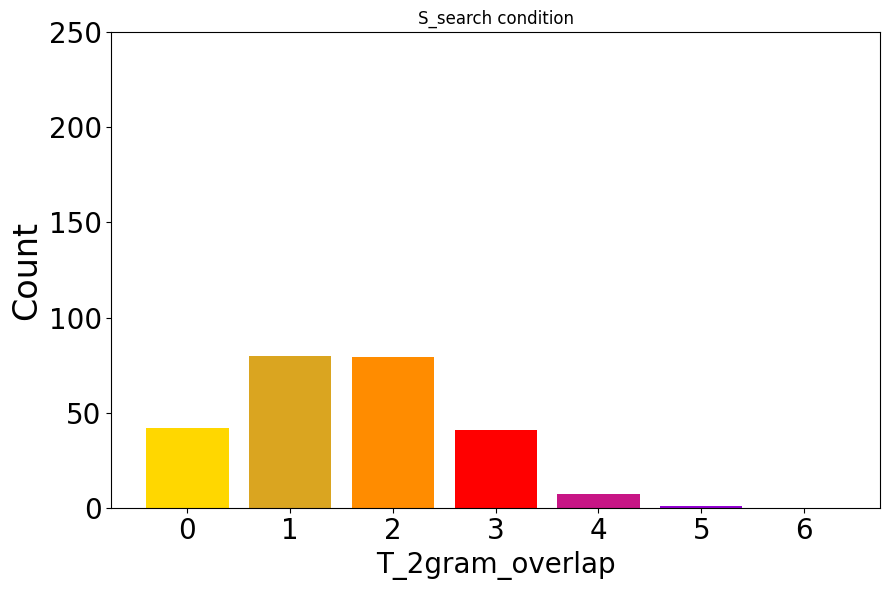

Only using D_search and S_search conditions. Number of items: 500


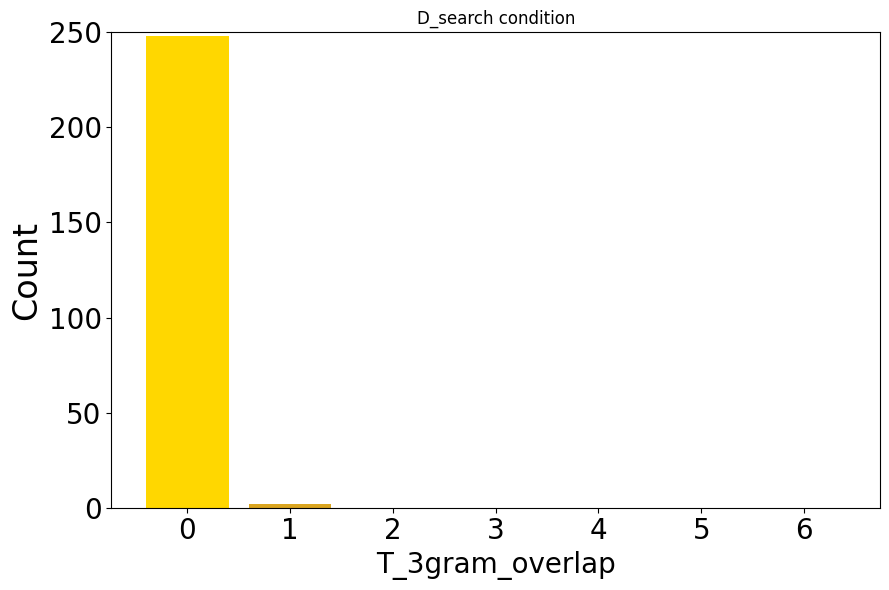

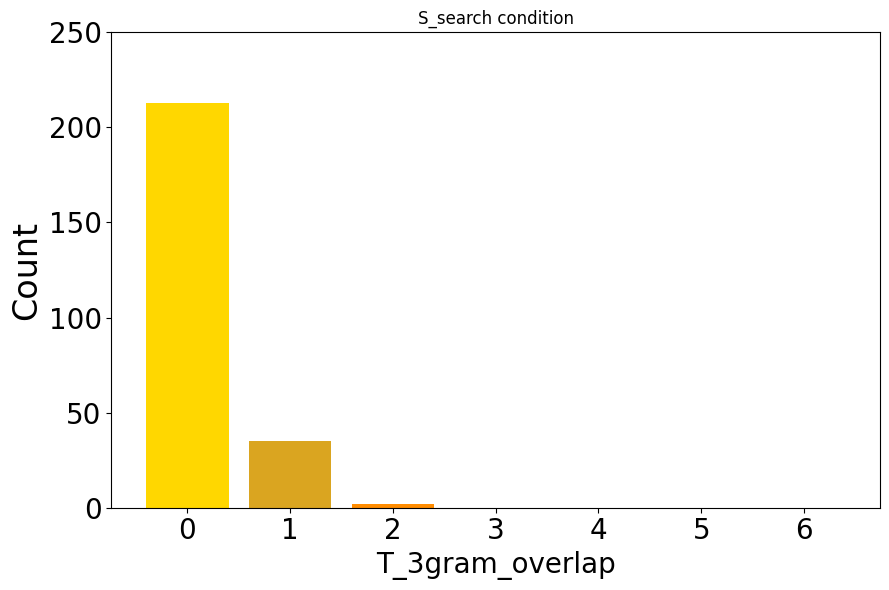

In [4]:
# Also make the histogram insets:
for ngram_color_col in ['T_1gram_overlap', 'T_2gram_overlap', 'T_3gram_overlap']:

    # Also plot histogram of the ngram overlap values for drive and suppress
    ngram_overlap_hist(ngram_col=ngram_color_col,
                       add_median=False,
                       ylim=[0,250],
                       save=save,
                       base_savestr=f'SI_Fig10A_{ngram_color_col}_inset',
                       add_savestr='',
                       PLOTDIR=PLOTDIR, CSVDIR=CSVDIR,
                       NGRAM_DATADIR='../../data_SI/',
                       NGRAM_fname='SI11_stimset_D-S_light_ngram-overlaps-sentence-level.csv')

## SI Figure 11B

The absolute difference between the encoding model predictions and the observed brain responses (y-axis) as a function of the number of n-gram overlaps (x-axis; unigram, bigram, and trigram in separate subplots).

In [22]:
df.cond_approach.unique()

array(['B', 'D_search', 'S_search', 'D_modify', 'S_modify'], dtype=object)



Plotting: abs_diff_vs_ngram_overlap-T_1gram_overlap_abs-diff-X=encoding_model_pred-Y=response_target_797-841-880_lang_LH_netw_SI_Fig11B_T_1gram_overlap
Total number of data points across 3 participants: 4500
Number of data points after filtering for D and B conditions: 500


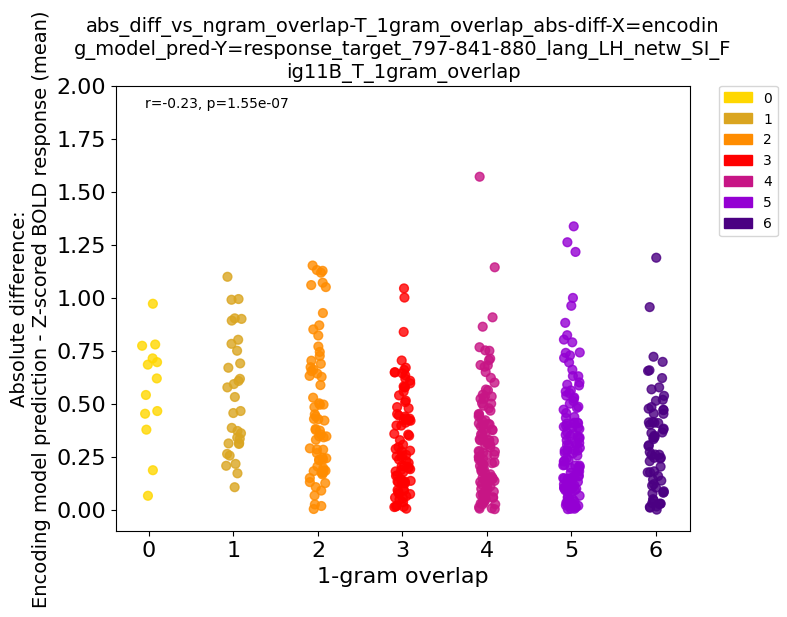



Plotting: abs_diff_vs_ngram_overlap-T_2gram_overlap_abs-diff-X=encoding_model_pred-Y=response_target_797-841-880_lang_LH_netw_SI_Fig11B_T_2gram_overlap
Total number of data points across 3 participants: 4500
Number of data points after filtering for D and B conditions: 500


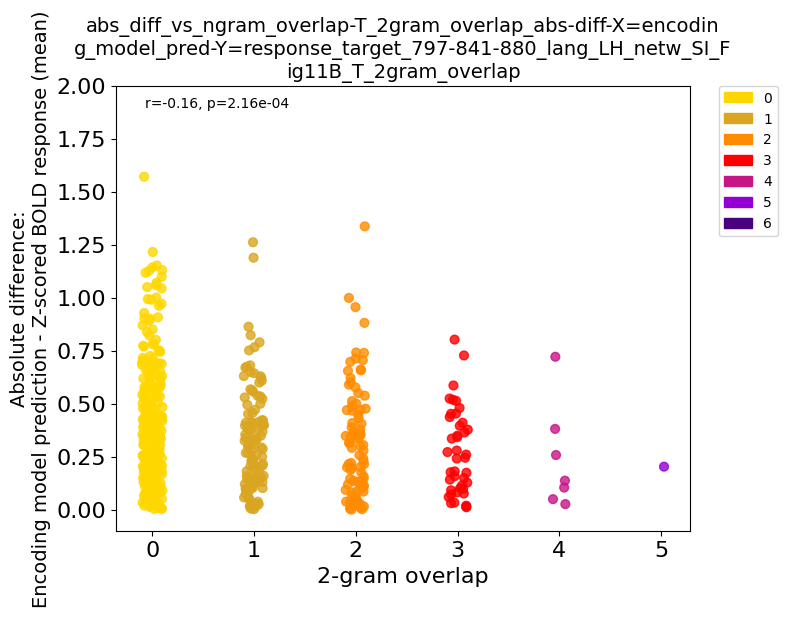



Plotting: abs_diff_vs_ngram_overlap-T_3gram_overlap_abs-diff-X=encoding_model_pred-Y=response_target_797-841-880_lang_LH_netw_SI_Fig11B_T_3gram_overlap
Total number of data points across 3 participants: 4500
Number of data points after filtering for D and B conditions: 500


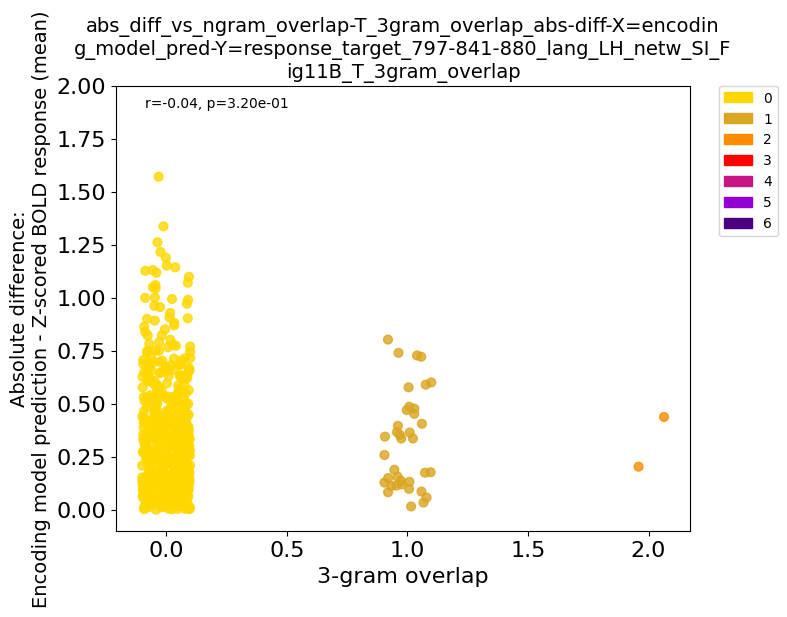

In [24]:
for ngram_color_col in ['T_1gram_overlap', 'T_2gram_overlap', 'T_3gram_overlap']:
    
    # Plotting the absolute difference of the predictions vs ngram overlap
    abs_diff_vs_ngram_overlap(df=df,
                                rois_of_interest=roi_flag,
                                target_UIDs=target_UID_flag,
                                x_val='encoding_model_pred',
                                y_val='response_target',
                                save=save,
                                base_savestr=f'SI_Fig11B_{ngram_color_col}',
                                add_savestr='',
                                PLOTDIR=PLOTDIR, CSVDIR=CSVDIR,
                                NGRAM_DATADIR='../../data_SI/',
                                NGRAM_fname='SI11_stimset_D-S_light_ngram-overlaps-sentence-level.csv',
                                ngram_color_col=ngram_color_col)

## SI Figure 12A

Unnormalized condition-level (event-related) barplots for the n=3 evaluation participants that were exposed to drive/suppress materials derived via the main search approach (cf. the main plots which were z-scored sessionwise per voxel).

In [32]:
from plot_utils import cond_barplot, condlevel_perc_inc



Plotting: cond-barplot_X=cond_Y=response_target_non_norm_y=-0.2-0.8_YERR=sem_within_UIDs_points=UID_797-841-880_lang_LH_netw_SI_Fig12A
Total number of data points across 3 participants: 4500
Min value: -0.04
Max value: 0.48


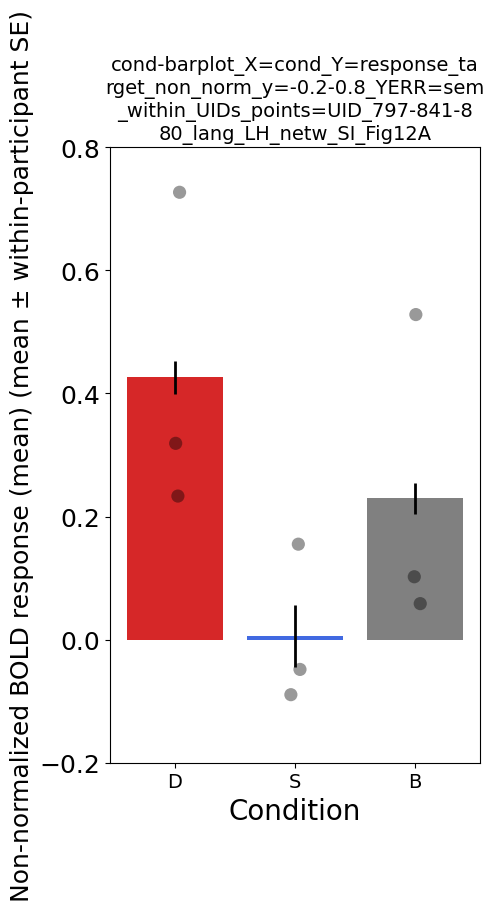

In [33]:
cond_barplot(df=df,
             x_val='cond',
             y_val='response_target_non_norm',
             ylim=[-0.2, 0.8],
             rois_of_interest='lang_LH_netw',
             target_UIDs=['797', '841', '880'], 
             yerr_type='sem_within_UIDs',
             individual_data_points='UID', 
             save=save,
             base_savestr='SI_Fig12A',
             add_savestr='',
             PLOTDIR=PLOTDIR, CSVDIR=CSVDIR,)

Quantify the percent signal change (based on the non-normalized data) from baseline to drive and suppress, respectively.

In [34]:
_ = condlevel_perc_inc(df=df,
                    target_UIDs=['797', '841', '880'],
                    rois_of_interest='lang_LH_netw',
                   response_target_col='response_target_non_norm',
                    perc_inc_from_cond='B',
                    compare_to_conds=['D','S'],
                    save=save,
                    base_savestr='SI_Fig12A_cond_increase',
                    add_savestr='',
                    CSVDIR=CSVDIR,)



Plotting: condlevel-perc-inc_from-cond=B_797-841-880_response_target_non_norm_lang_LH_netw_SI_Fig12A_cond_increase
Total number of data points across 3 participants: 4500
Percent increase from B to D: 85.696%
Percent increase from B to S: -97.506%


## SI Figure 12B

Unnormalized condition-level (blocked) barplots for the n=4 evaluation participants that were exposed to drive/suppress materials derived via the main search approach (cf. the main plots which were z-scored per voxel).

In [35]:
from plot_utils import condlevel_perc_inc_blocked
fname_blocked = '../../data/brain-lang-blocked-data_participant_20230728.csv' # We show blocked data in addition to the main event-related design.
df_blocked = pd.read_csv(fname_blocked)



Plotting: cond-barplot_X=cond_Y=response_target_non_norm_y=0-3_YERR=sem_within_UIDs_points=UID_946-947-866-958_lang_LH_netw_SI_Fig12B
Total number of data points across 4 participants: 12
Min value: 0.47
Max value: 1.92


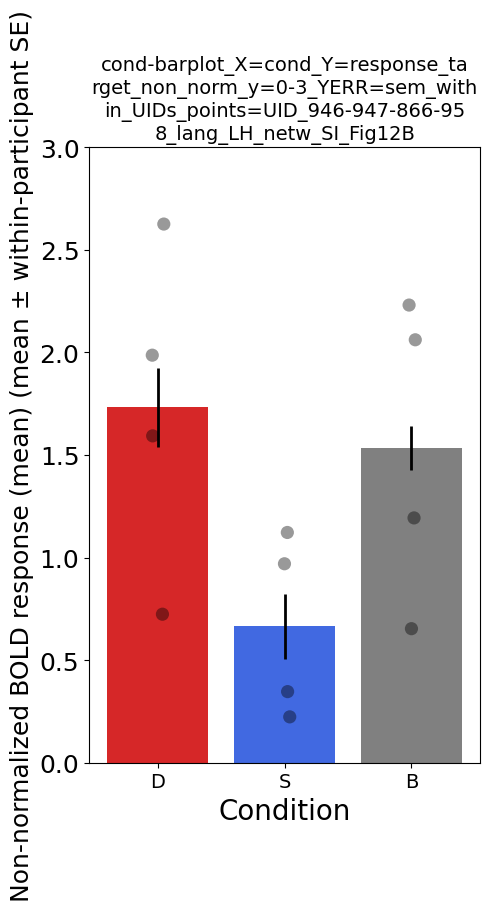

In [36]:
cond_barplot(df=df_blocked,
             x_val='cond',
             y_val='response_target_non_norm',
             ylim=[0, 3],
             rois_of_interest='lang_LH_netw',
             target_UIDs=['946', '947', '866', '958'], 
             yerr_type='sem_within_UIDs',
             individual_data_points='UID', 
             save=save,
             base_savestr='SI_Fig12B',
             add_savestr='',
             PLOTDIR=PLOTDIR, CSVDIR=CSVDIR)

In [37]:
_ = condlevel_perc_inc_blocked(df=df_blocked,
                        target_UIDs=['946', '947', '866', '958'],
                        rois_of_interest='lang_LH_netw',
                       response_target_col='response_target_non_norm',
                        perc_inc_from_cond='B',
                        compare_to_conds=['D','S'],
                        save=save,
                        base_savestr='SI_Fig12B_cond_increase',
                        add_savestr='',
                        CSVDIR=CSVDIR,)



Plotting: condlevel-perc-inc-blocked_from-cond=B_946-947-866-958_response_target_non_norm_lang_LH_netw_SI_Fig12B_cond_increase
Total number of data points across 4 participants: 12
Percent increase from B to D: 12.872%
Percent increase from B to S: -56.639%


## SI Figure 13

Sentence-level brain responses from each of the three evaluation participants versus predicted responses from the encoding model.

In [38]:
from plot_utils import item_scatter



Plotting: item-scatter_X=encoding_model_pred_Y=response_target_YERR=None_xl=-0.75-0.75_yl=-3-3_mean=True_a=0.8_i=True_797_lang_LH_netw_SI_Fig13_['797']
Total number of data points across 1 participants: 1500
Min of encoding_model_pred: -0.529797 and max of encoding_model_pred: 0.684224
Min of response_target: -2.249420 and max of response_target: 2.151151


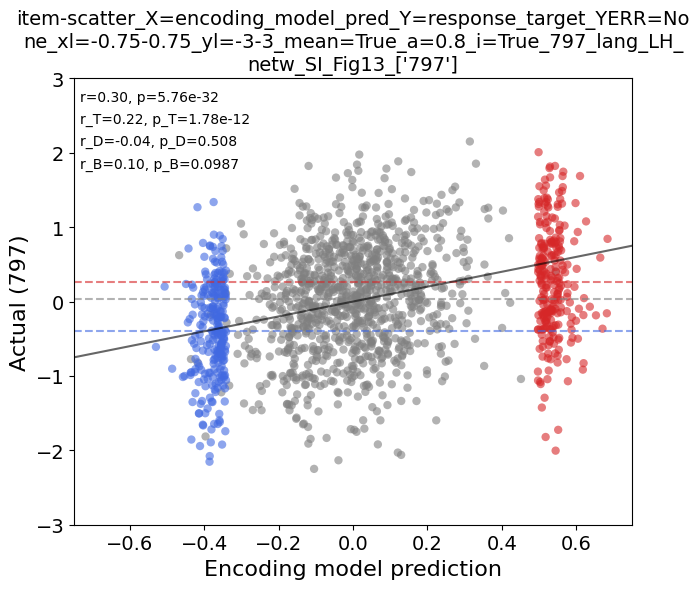



Plotting: item-scatter_X=encoding_model_pred_Y=response_target_YERR=None_xl=-0.75-0.75_yl=-3-3_mean=True_a=0.8_i=True_841_lang_LH_netw_SI_Fig13_['841']
Total number of data points across 1 participants: 1500
Min of encoding_model_pred: -0.529797 and max of encoding_model_pred: 0.684224
Min of response_target: -1.887515 and max of response_target: 2.611121


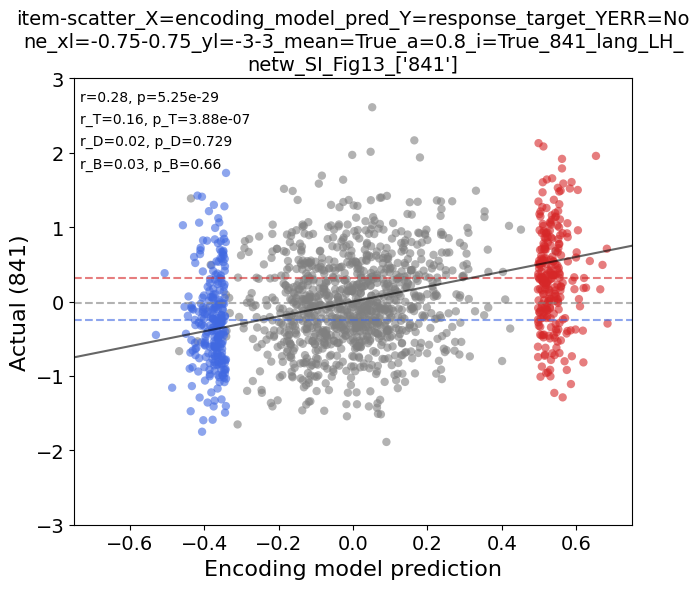



Plotting: item-scatter_X=encoding_model_pred_Y=response_target_YERR=None_xl=-0.75-0.75_yl=-3-3_mean=True_a=0.8_i=True_880_lang_LH_netw_SI_Fig13_['880']
Total number of data points across 1 participants: 1500
Min of encoding_model_pred: -0.529797 and max of encoding_model_pred: 0.684224
Min of response_target: -2.365444 and max of response_target: 2.221615


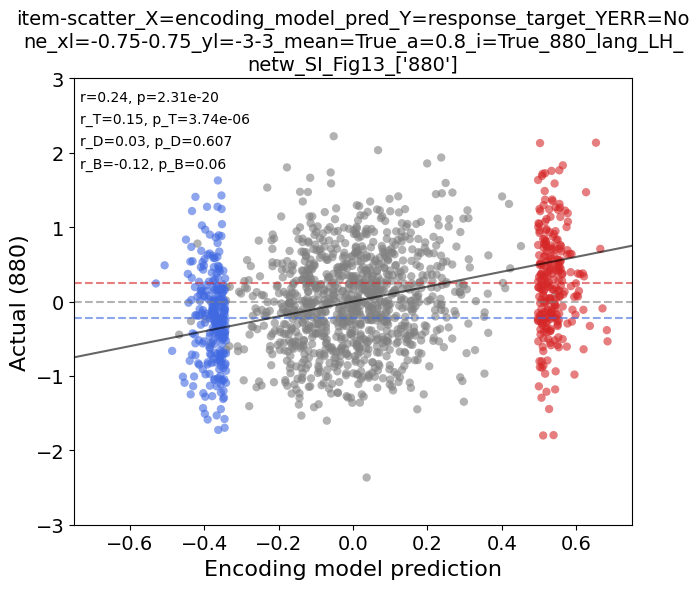

In [39]:
# Plotting parameters 
target_UID_flags = [['797'], ['841'], ['880']]
roi_flag = 'lang_LH_netw'
target_norm = 'bySessVoxZ'
plot_aspect_flag, add_identity_flag, d_xlim, d_ylim = item_scatter_style(style_setting='wide')

for target_UID_flag in target_UID_flags:
    target_UID_flag_str = '-'.join(target_UID_flag)
    
    xlim_flag = d_xlim[roi_flag][target_norm][target_UID_flag_str]
    ylim_flag = d_ylim[roi_flag][target_norm][target_UID_flag_str]

    item_scatter(df=df,
                 rois_of_interest=roi_flag,
                 target_UIDs=target_UID_flag,
                 x_val='encoding_model_pred',
                 y_val='response_target',
                 yerr_type=None,
                 add_mean=True,
                 plot_aspect=plot_aspect_flag,
                 add_identity=add_identity_flag,
                 xlim=xlim_flag,
                 ylim=ylim_flag,
                 save=save,
                 base_savestr=f'SI_Fig13_{target_UID_flag}',
                 add_savestr='',
                 PLOTDIR=PLOTDIR, CSVDIR=CSVDIR, )

## SI Figure 14

Scatter plot of the observed, un-normalized brain responses (y-axis; from n=3 evaluation participants) versus the encoding model predictions (x-axis) for each sentence (n=1,000 baseline sentences, n=250 drive sentences, and n=250 suppress sentences).

In [40]:
# Plotting parameters 
import sys
sys.path.append("..")
from resources import item_scatter_style
from plot_utils import item_scatter

target_UID_flag = ['797', '841', '880']
roi_flag = 'lang_LH_netw'
target_norm = 'None'
target_UID_flag_str = '-'.join(target_UID_flag)

plot_aspect_flag, add_identity_flag, d_xlim, d_ylim = item_scatter_style(style_setting='wide')

xlim_flag = d_xlim[roi_flag][target_norm][target_UID_flag_str]
ylim_flag = d_ylim[roi_flag][target_norm][target_UID_flag_str]



Plotting: item-scatter_X=encoding_model_pred_Y=response_target_non_norm_YERR=None_xl=-0.75-0.75_yl=-1.5-1.5_mean=True_a=0.8_i=True_797-841-880_lang_LH_netw_SI_Fig14
Total number of data points across 3 participants: 4500
Min of encoding_model_pred: -0.529797 and max of encoding_model_pred: 0.684224
Min of response_target_non_norm: -0.796332 and max of response_target_non_norm: 1.214285


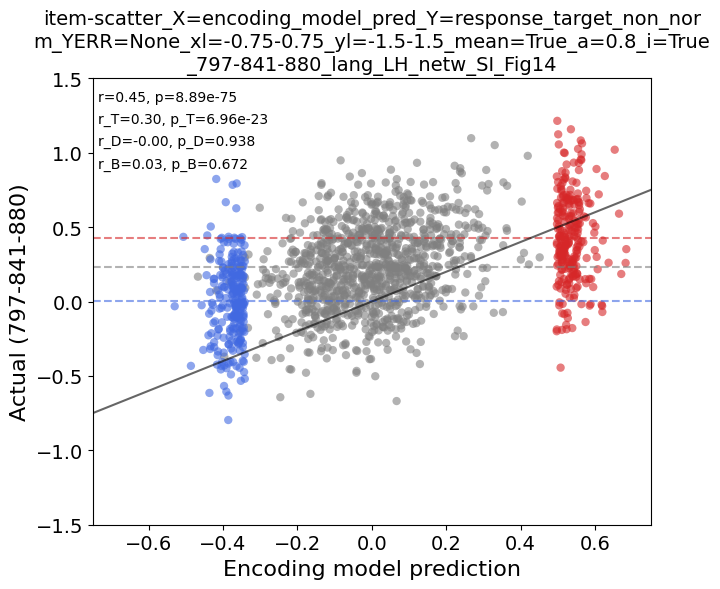

In [41]:
item_scatter(df=df,
             rois_of_interest=roi_flag,
             target_UIDs=target_UID_flag,
             x_val='encoding_model_pred',
             y_val='response_target_non_norm',
             yerr_type=None,
             add_mean=True,
             plot_aspect=plot_aspect_flag,
             add_identity=add_identity_flag,
             xlim=xlim_flag,
             ylim=ylim_flag,
             save=save,
             base_savestr='SI_Fig14',
             add_savestr='',
             PLOTDIR=PLOTDIR, CSVDIR=CSVDIR, )

## SI Figure 15F

Condition-level (event-related) barplots for the n=3 evaluation participants that were exposed to drive/suppress materials derived via the main search approach, for each individual left-hemisphere fROI (cf. averaged across all voxels in these fROIs).

In [42]:
from plot_utils import cond_barplot



Plotting: cond-barplot_X=cond_Y=response_target_y=-0.5-0.5_YERR=sem_within_UIDs_points=UID_797-841-880_lang_LH_IFGorb_SI_Fig15F_lang_LH_IFGorb
Total number of data points across 3 participants: 4500
Min value: -0.38
Max value: 0.37


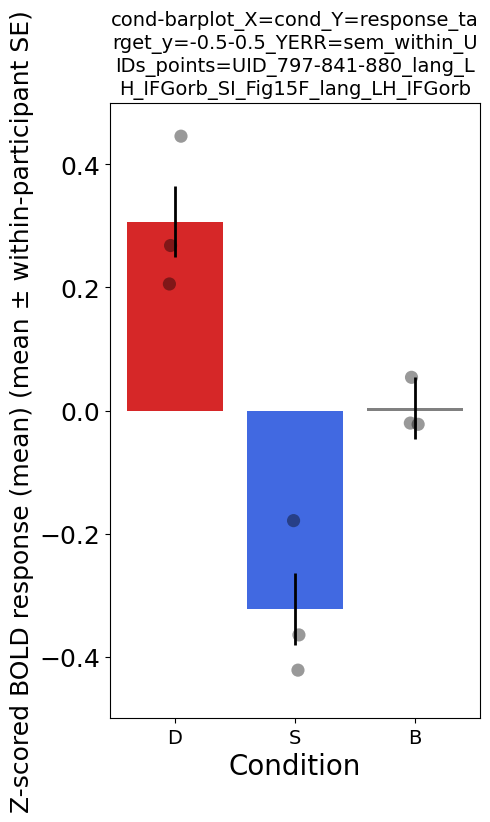



Plotting: cond-barplot_X=cond_Y=response_target_y=-0.5-0.52_YERR=sem_within_UIDs_points=UID_797-841-880_lang_LH_IFG_SI_Fig15F_lang_LH_IFG
Total number of data points across 3 participants: 4500
Min value: -0.35
Max value: 0.45


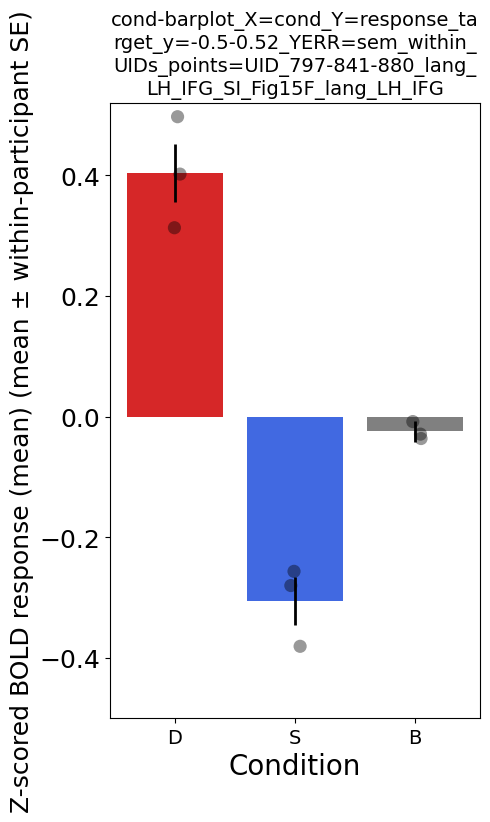



Plotting: cond-barplot_X=cond_Y=response_target_y=-0.5-0.5_YERR=sem_within_UIDs_points=UID_797-841-880_lang_LH_MFG_SI_Fig15F_lang_LH_MFG
Total number of data points across 3 participants: 4500
Min value: -0.35
Max value: 0.37


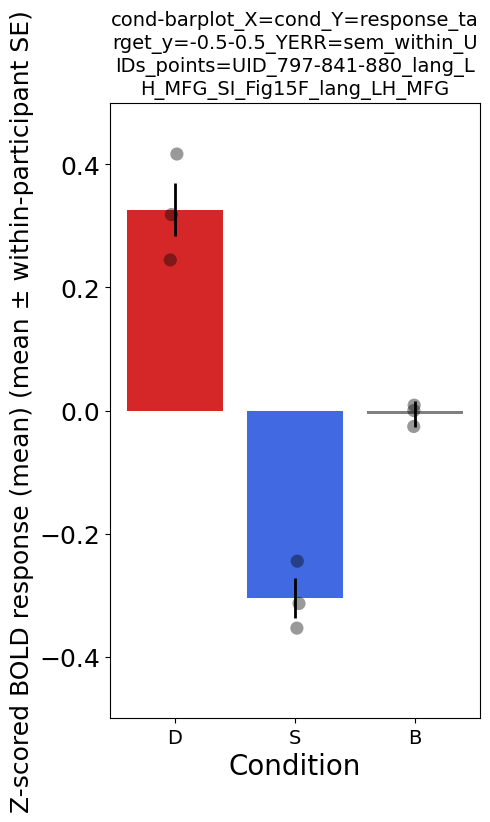



Plotting: cond-barplot_X=cond_Y=response_target_y=-0.5-0.5_YERR=sem_within_UIDs_points=UID_797-841-880_lang_LH_AntTemp_SI_Fig15F_lang_LH_AntTemp
Total number of data points across 3 participants: 4500
Min value: -0.35
Max value: 0.30


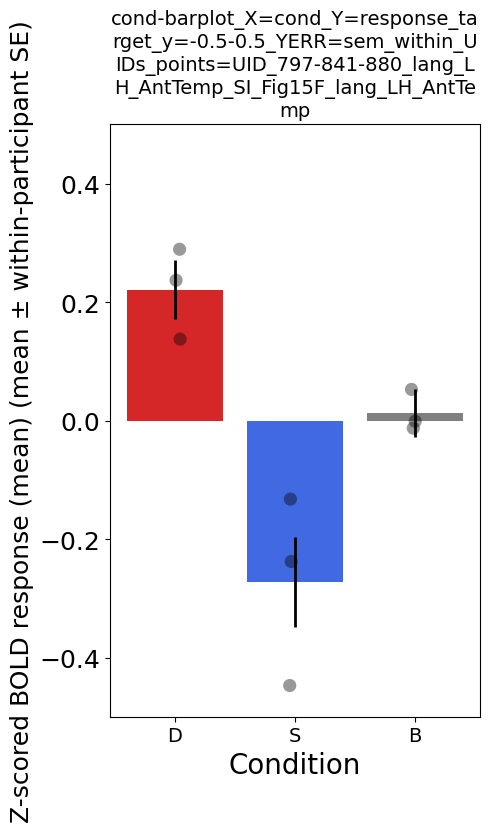



Plotting: cond-barplot_X=cond_Y=response_target_y=-0.5-0.5_YERR=sem_within_UIDs_points=UID_797-841-880_lang_LH_PostTemp_SI_Fig15F_lang_LH_PostTemp
Total number of data points across 3 participants: 4500
Min value: -0.34
Max value: 0.31


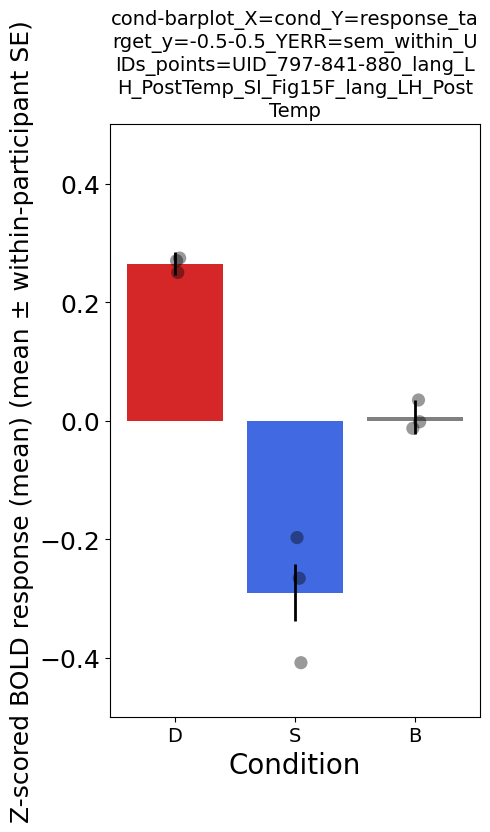

In [44]:
rois = ['lang_LH_IFGorb', 'lang_LH_IFG', 'lang_LH_MFG', 'lang_LH_AntTemp', 'lang_LH_PostTemp']

for roi in rois:
    if roi == 'lang_LH_IFG':
        ylim = [-0.5, 0.52]
    else:
        ylim = [-0.5, 0.5]
        
    cond_barplot(df=df,
                 x_val='cond',
                 y_val='response_target',
                 ylim=ylim,
                 rois_of_interest=roi,
                 target_UIDs=['797', '841', '880'], 
                 yerr_type='sem_within_UIDs',
                 individual_data_points='UID', 
                 save=save,
                 base_savestr=f'SI_Fig15F_{roi}',
                 add_savestr='',
                 PLOTDIR=PLOTDIR, CSVDIR=CSVDIR,)

## SI Figure 15G

Condition-level (event-related) barplots for the n=3 evaluation participants that were exposed to drive/suppress materials derived via the main search approach, for left/right hemisphere functionally-defined language, MD, and DMN networks.

In [45]:
from plot_utils import cond_barplot
df_all_rois = pd.read_csv('../../data_SI/brain-allroi-data_participant_20231001.csv')



Plotting: cond-barplot_X=cond_Y=response_target_y=-0.5-0.5_YERR=sem_within_UIDs_points=UID_797-841-880_lang_LH_netw_SI_Fig15G_lang_LH_netw
Total number of data points across 3 participants: 4500
Min value: -0.33
Max value: 0.32


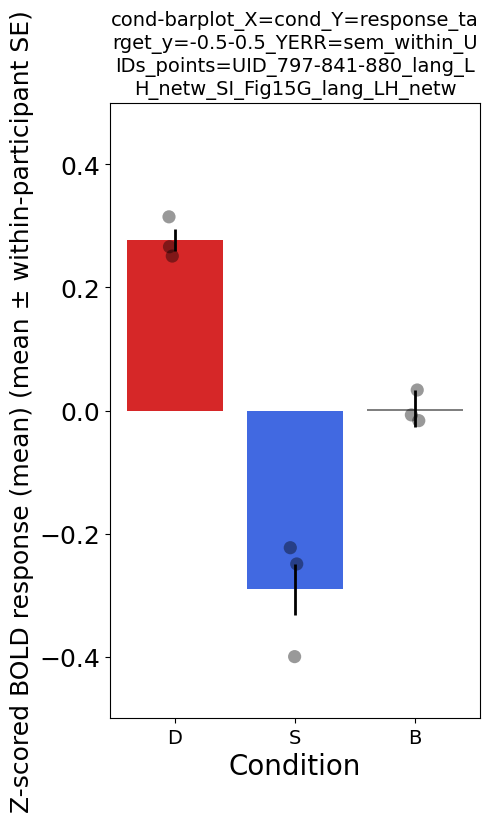



Plotting: cond-barplot_X=cond_Y=response_target_y=-0.5-0.5_YERR=sem_within_UIDs_points=UID_797-841-880_lang_RH_netw_SI_Fig15G_lang_RH_netw
Total number of data points across 3 participants: 4500
Min value: -0.11
Max value: 0.13


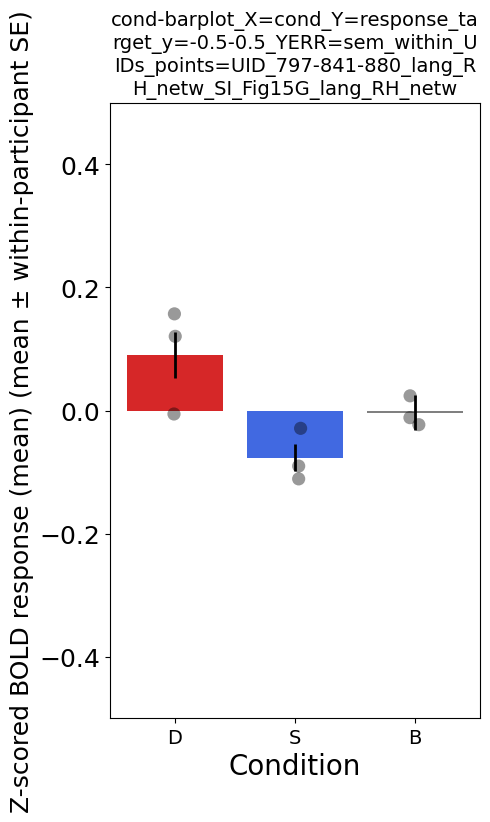



Plotting: cond-barplot_X=cond_Y=response_target_y=-0.5-0.5_YERR=sem_within_UIDs_points=UID_797-841-880_md_LH_netw_SI_Fig15G_md_LH_netw
Total number of data points across 3 participants: 4500
Min value: -0.21
Max value: 0.34


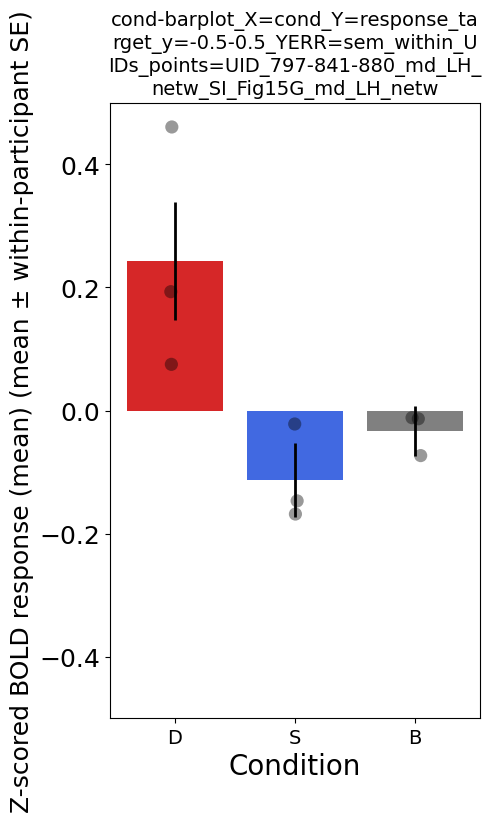



Plotting: cond-barplot_X=cond_Y=response_target_y=-0.5-0.5_YERR=sem_within_UIDs_points=UID_797-841-880_md_RH_netw_SI_Fig15G_md_RH_netw
Total number of data points across 3 participants: 4500
Min value: -0.06
Max value: 0.16


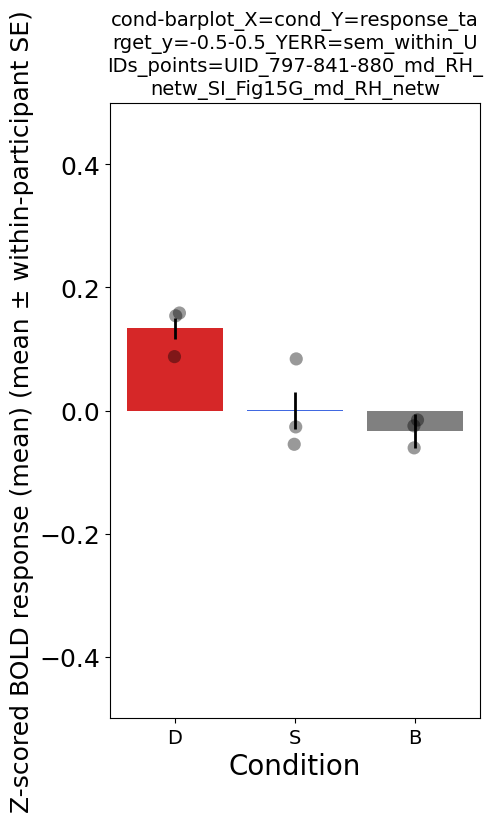



Plotting: cond-barplot_X=cond_Y=response_target_y=-0.5-0.5_YERR=sem_within_UIDs_points=UID_797-841-880_dmn_LH_netw_SI_Fig15G_dmn_LH_netw
Total number of data points across 3 participants: 4500
Min value: -0.09
Max value: 0.04


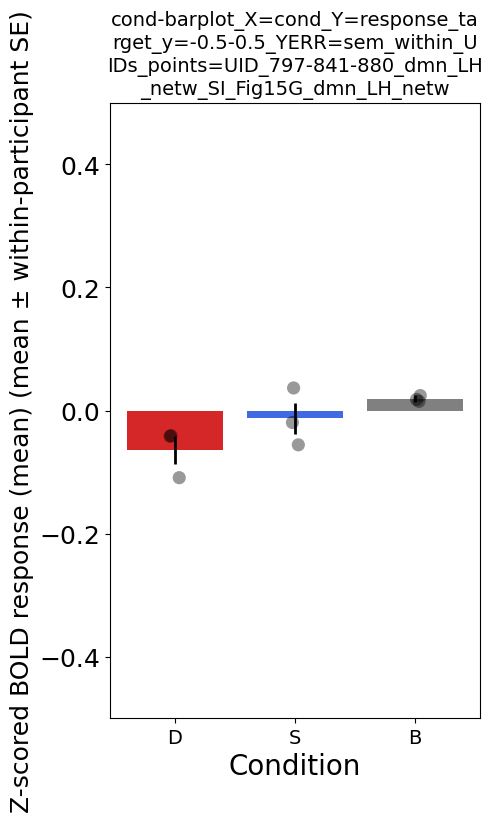



Plotting: cond-barplot_X=cond_Y=response_target_y=-0.5-0.5_YERR=sem_within_UIDs_points=UID_797-841-880_dmn_RH_netw_SI_Fig15G_dmn_RH_netw
Total number of data points across 3 participants: 4500
Min value: -0.10
Max value: 0.04


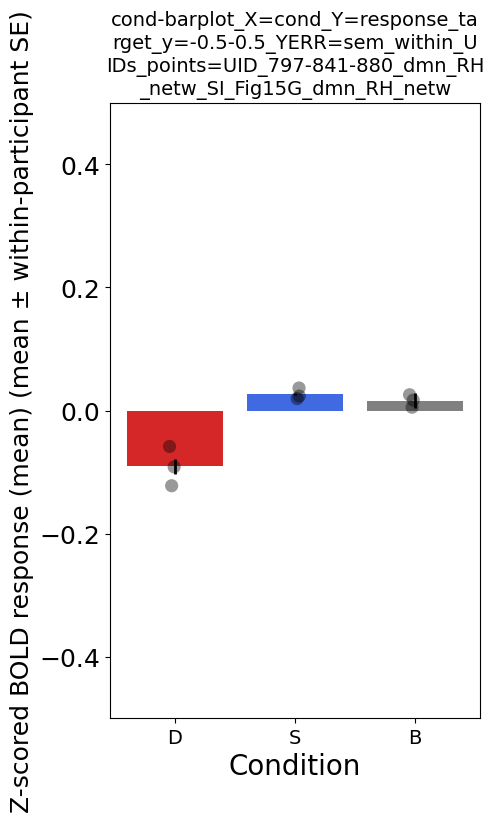

In [46]:
rois = ['lang_LH_netw', 'lang_RH_netw', 'md_LH_netw', 'md_RH_netw', 'dmn_LH_netw', 'dmn_RH_netw']
ylim = [-0.5, 0.5]

for roi in rois:
        
    cond_barplot(df=df_all_rois,
                 x_val='cond',
                 y_val='response_target',
                 ylim=ylim,
                 rois_of_interest=roi,
                 target_UIDs=['797', '841', '880'], 
                 yerr_type='sem_within_UIDs',
                 individual_data_points='UID', 
                 save=save,
                 base_savestr=f'SI_Fig15G_{roi}',
                 add_savestr='',
                 PLOTDIR=PLOTDIR, CSVDIR=CSVDIR,)

## SI Figure 16A

Condition-level (event-related) barplots for the n=2 evaluation participants that were exposed to drive/suppress materials derived via the exploratory modify approach.

In [47]:
from plot_utils import cond_barplot, item_scatter



Plotting: cond-barplot_X=cond_Y=response_target_y=-0.5-0.5_YERR=sem_within_UIDs_points=UID_837-856_lang_LH_netw_SI_Fig16A
Total number of data points across 2 participants: 3000
Min value: -0.08
Max value: 0.18


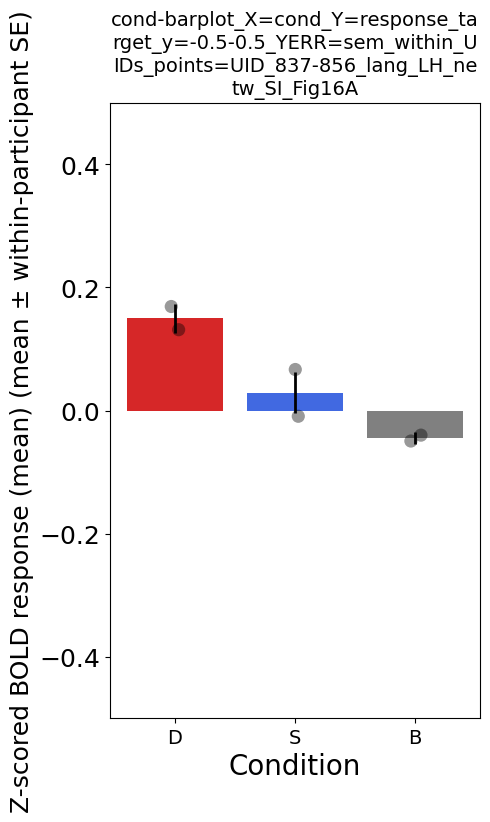

In [48]:
cond_barplot(df=df,
             x_val='cond',
             y_val='response_target',
             ylim=[-0.5, 0.5],
             rois_of_interest='lang_LH_netw',
             target_UIDs=['837','856'],
             yerr_type='sem_within_UIDs',
             individual_data_points='UID', 
             save=save,
             base_savestr='SI_Fig16A',
             add_savestr='',
             PLOTDIR=PLOTDIR, CSVDIR=CSVDIR,)

In [49]:
_ = condlevel_perc_inc(df=df,
                    target_UIDs=['837', '856'],
                    rois_of_interest='lang_LH_netw',
                   response_target_col='response_target_non_norm',
                    perc_inc_from_cond='B',
                    compare_to_conds=['D','S'],
                    save=save,
                    base_savestr='SI_Fig16A_cond_increase',
                    add_savestr='',
                    CSVDIR=CSVDIR,)



Plotting: condlevel-perc-inc_from-cond=B_837-856_response_target_non_norm_lang_LH_netw_SI_Fig16A_cond_increase
Total number of data points across 2 participants: 3000
Percent increase from B to D: 56.965%
Percent increase from B to S: 19.522%


## SI Figure 16B

In [50]:
# Plotting parameters 
import sys
sys.path.append("..")
from resources import item_scatter_style
from plot_utils import item_scatter

target_UID_flag = ['837', '856']
roi_flag = 'lang_LH_netw'
target_norm = 'bySessVoxZ'
target_UID_flag_str = '-'.join(target_UID_flag)

plot_aspect_flag, add_identity_flag, d_xlim, d_ylim = item_scatter_style(style_setting='wide')

xlim_flag = d_xlim[roi_flag][target_norm][target_UID_flag_str]
ylim_flag = d_ylim[roi_flag][target_norm][target_UID_flag_str]



Plotting: item-scatter_X=encoding_model_pred_Y=response_target_YERR=None_xl=-1-1_yl=-2.4-2.4_mean=True_a=0.8_i=True_837-856_lang_LH_netw_SI_Fig16B
Total number of data points across 2 participants: 3000
Min of encoding_model_pred: -0.467381 and max of encoding_model_pred: 0.888350
Min of response_target: -1.545175 and max of response_target: 2.127969


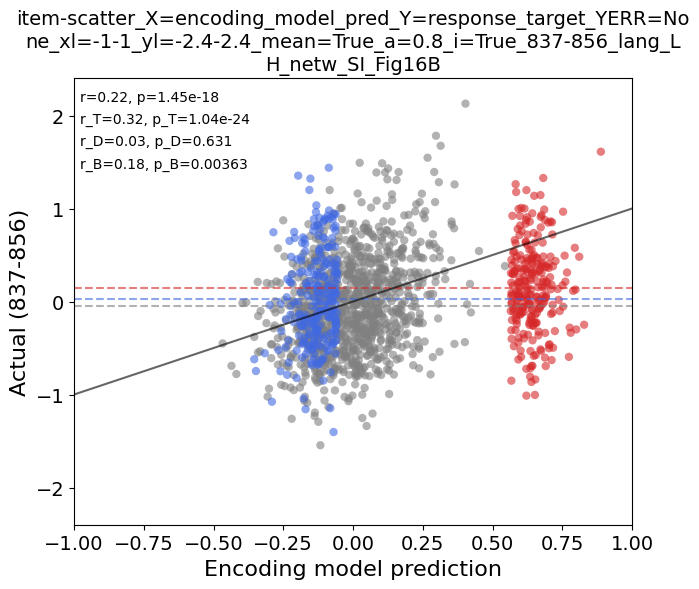

In [51]:
item_scatter(df=df,
             rois_of_interest=roi_flag,
             target_UIDs=target_UID_flag,
             x_val='encoding_model_pred',
             y_val='response_target',
             yerr_type=None,
             add_mean=True,
             plot_aspect=plot_aspect_flag,
             add_identity=add_identity_flag,
             xlim=xlim_flag,
             ylim=ylim_flag,
             save=save,
             base_savestr='SI_Fig16B',
             add_savestr='',
             PLOTDIR=PLOTDIR, CSVDIR=CSVDIR, )

## SI Figure 17

Predictions from the main encoding model (using GPT2-XL hidden layer 22) versus three different "surprisal models" (i.e., sentence-level surprisal used as a predictor). 

In [52]:
# Plotting parameters 
import sys
sys.path.append("..")
from resources import item_scatter_style
from plot_utils import item_scatter_surp_preds

target_UID_flag = ['797','841','880']
roi_flag = 'lang_LH_netw'
target_norm = 'bySessVoxZ'
target_UID_flag_str = '-'.join(target_UID_flag)

plot_aspect_flag, add_identity_flag, d_xlim, d_ylim = item_scatter_style(style_setting='wide')

xlim_flag = d_xlim[roi_flag][target_norm][target_UID_flag_str]
ylim_flag = d_ylim[roi_flag][target_norm][target_UID_flag_str]

In [53]:
fname_surp_preds = '../../data_SI/SI17-preds-surp-data.csv' 
df_surp_preds = pd.read_csv(fname_surp_preds) # Has the predictions for each surprisal model in their respective columns, and response_target has the averaged brain data over UIDs: 797, 841, 880

Number of items: 4500
Min of encoding_model_pred: -0.529797 and max of encoding_model_pred: 0.684224
Min of response_target: -1.347397 and max of response_target: 1.497439


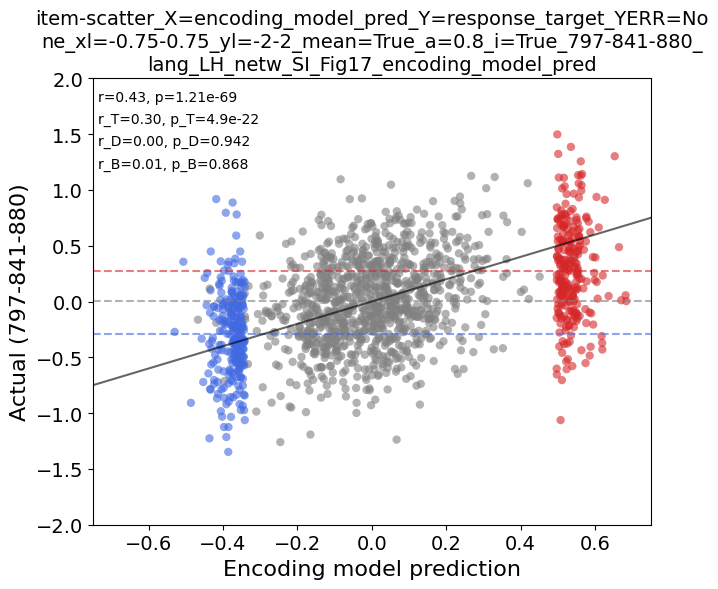

Number of items: 1500
Min of pred-surprisal-5gram_mean: -0.202218 and max of pred-surprisal-5gram_mean: 0.327970
Min of response_target: -1.347397 and max of response_target: 1.497439


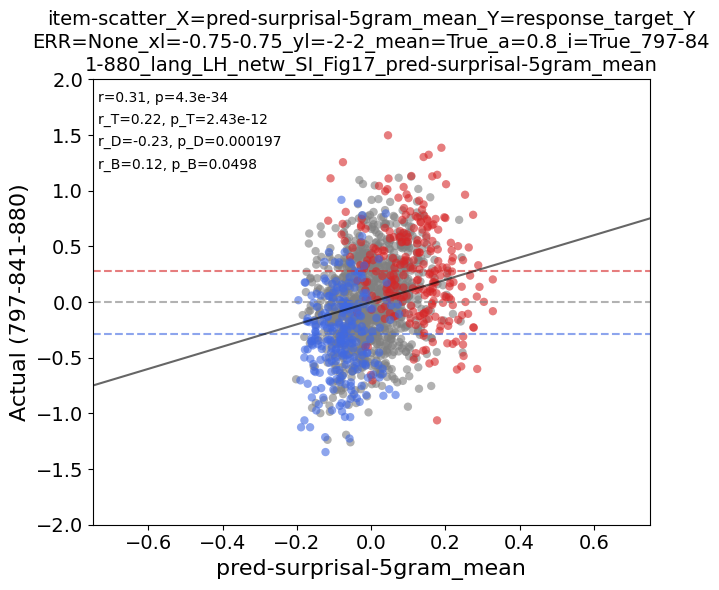

Number of items: 1500
Min of pred-surprisal-pcfg_mean: -0.149160 and max of pred-surprisal-pcfg_mean: 0.252022
Min of response_target: -1.347397 and max of response_target: 1.497439


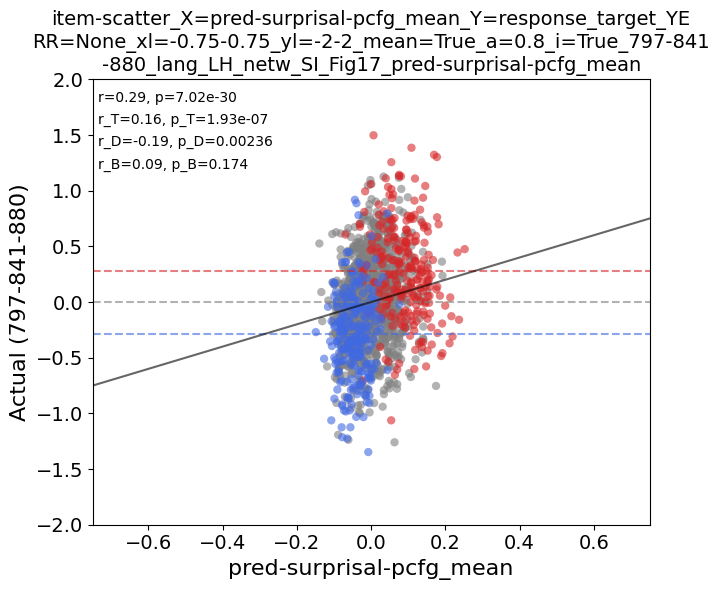

Number of items: 1500
Min of pred-surprisal-gpt2-xl_mean: -0.203246 and max of pred-surprisal-gpt2-xl_mean: 0.487638
Min of response_target: -1.347397 and max of response_target: 1.497439


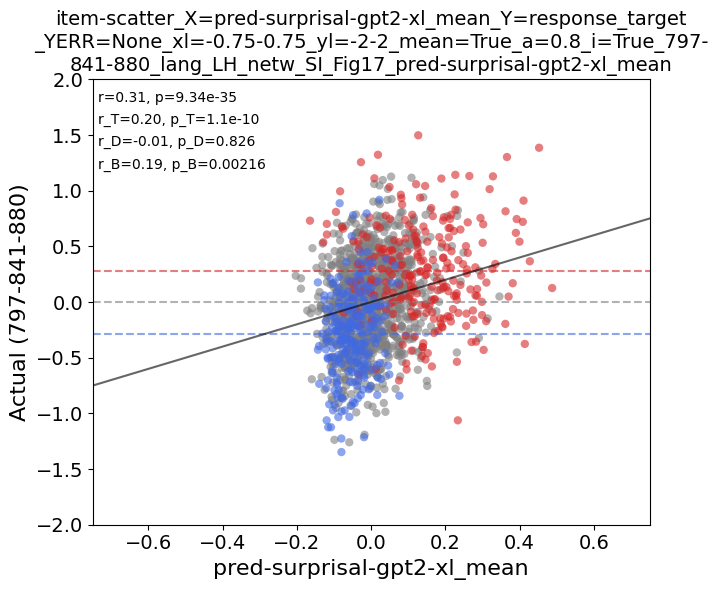

In [54]:
for pred in ['encoding_model_pred', 'pred-surprisal-5gram_mean', 'pred-surprisal-pcfg_mean', 'pred-surprisal-gpt2-xl_mean']:
    df_pred = df_surp_preds[~df_surp_preds[pred].isna()] # Fetch the columns of interest. We expect 1,500 predictions in total
    print(f'Number of items: {len(df_pred)}')

    item_scatter_surp_preds(df=df_pred,
                 rois_of_interest=roi_flag,
                 target_UIDs=target_UID_flag,
                 x_val=pred,
                 y_val='response_target',
                 yerr_type=None,
                 add_mean=True,
                 plot_aspect=plot_aspect_flag,
                 add_identity=add_identity_flag,
                 xlim=xlim_flag,
                 ylim=ylim_flag,
                 save=save,
                 base_savestr=f'SI_Fig17_{pred}',
                 add_savestr='',
                 PLOTDIR=PLOTDIR, CSVDIR=CSVDIR, )

## SI Figure 19

In [55]:
# Plotting parameters 
import sys
sys.path.append("..")
from resources import d_colors
from plot_utils import feature_barplot, groupby_coord

feats_of_interest = [
    'log-prob-gpt2-xl_mean',
    'rating_gram_mean',
    'rating_sense_mean',

    'rating_others_thoughts_mean',
    'rating_physical_mean',
    'rating_places_mean',

    'rating_valence_mean',
    'rating_arousal_mean',

    'rating_imageability_mean',

    'rating_frequency_mean',
    'rating_conversational_mean',
    ]

In [56]:
# Obtain behavioral ratings per item id (the behavioral rating values are the same across participants, of course)
df_item_id = groupby_coord(df=df,
                           coord_col='item_id',
                           aggfunc='mean')

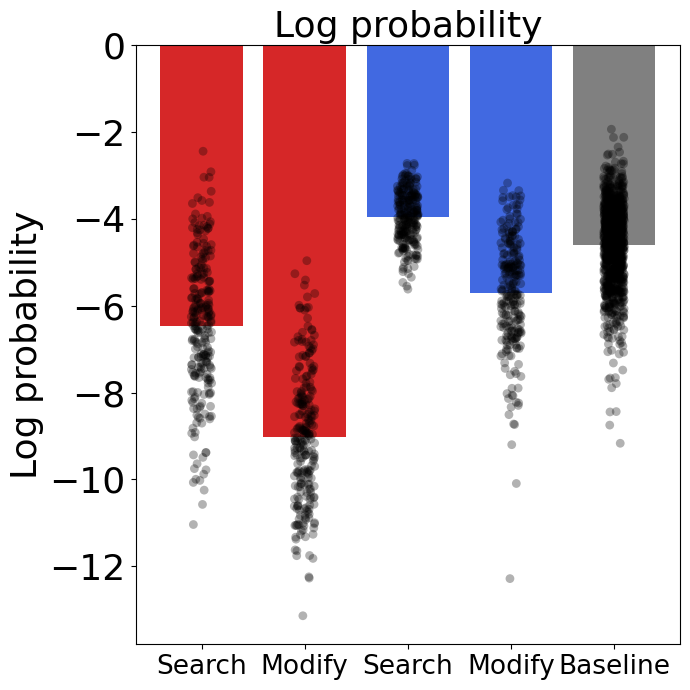

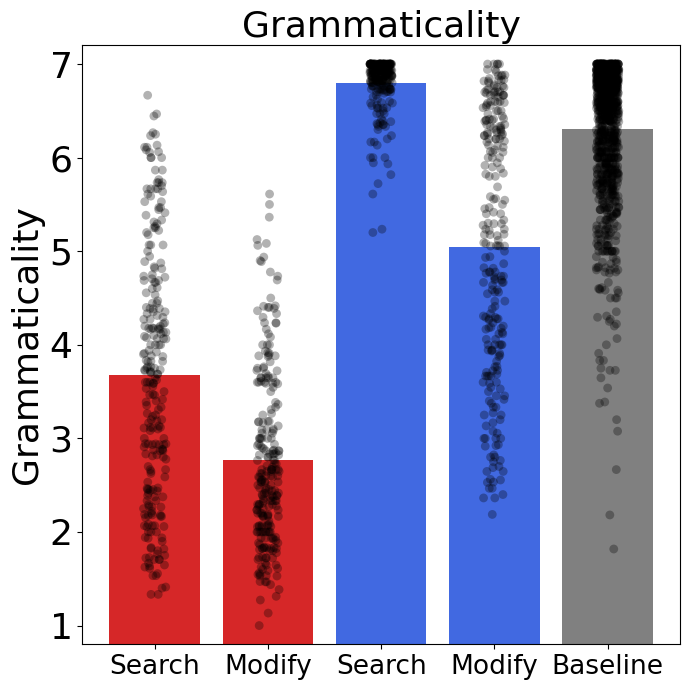

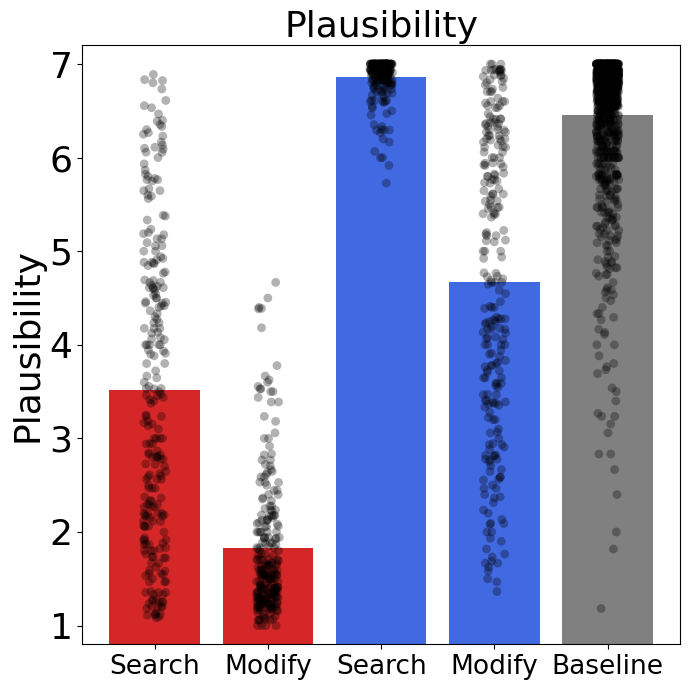

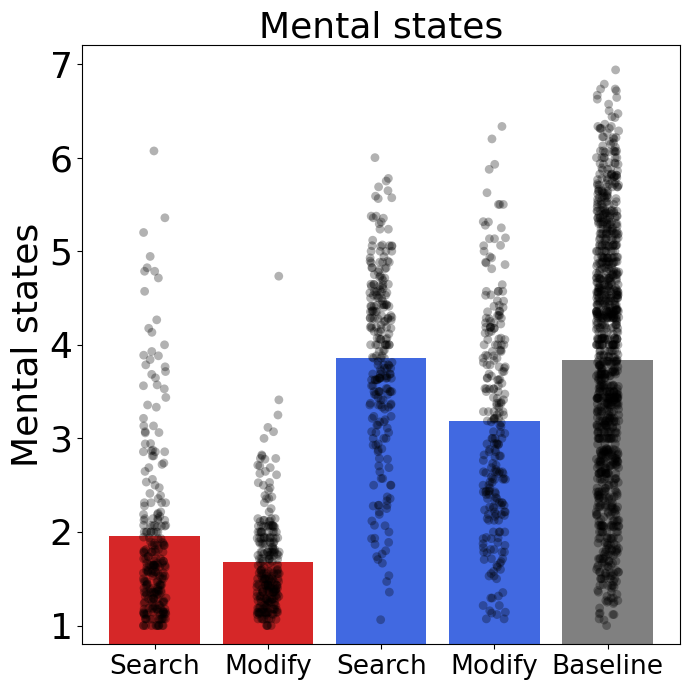

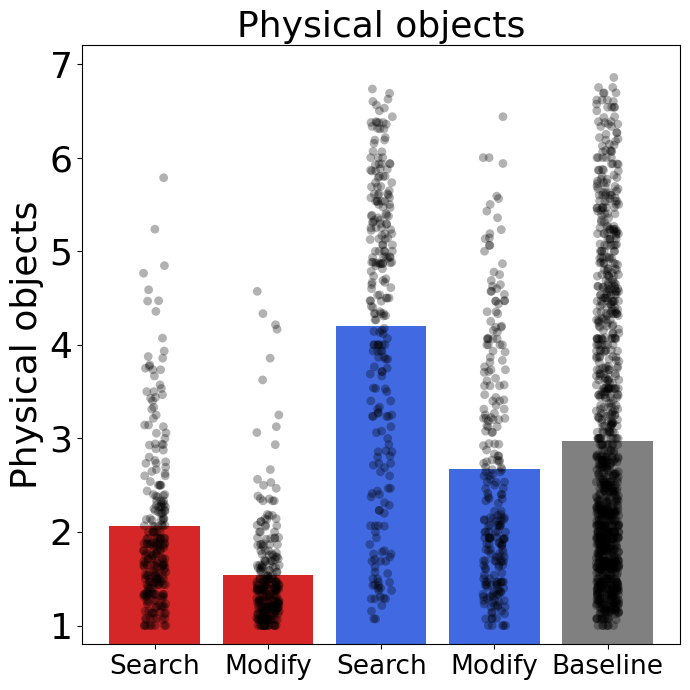

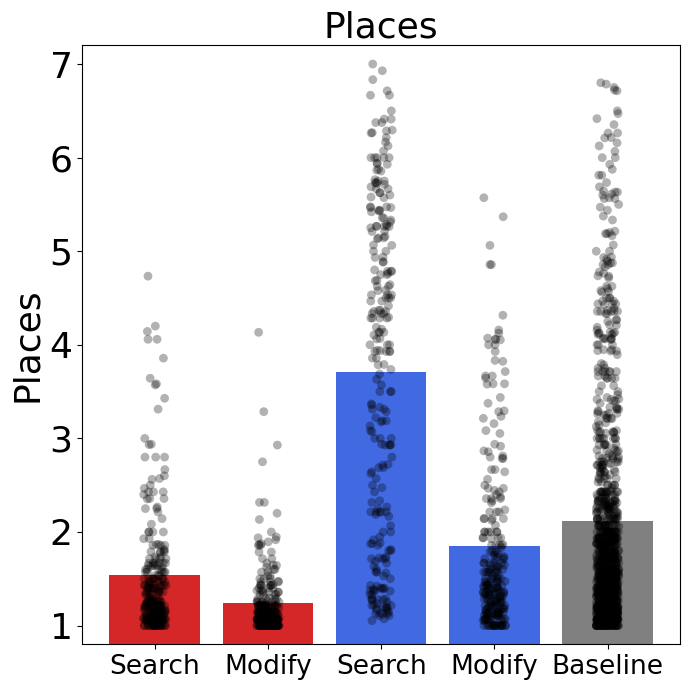

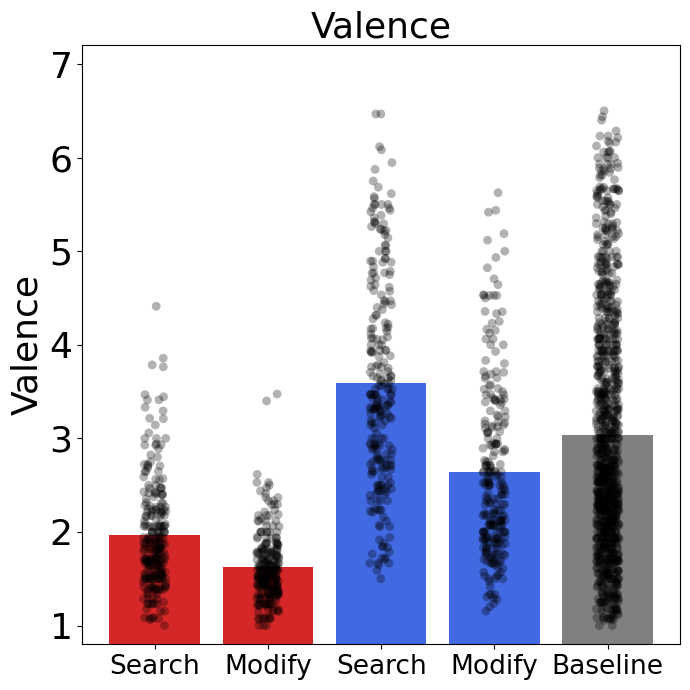

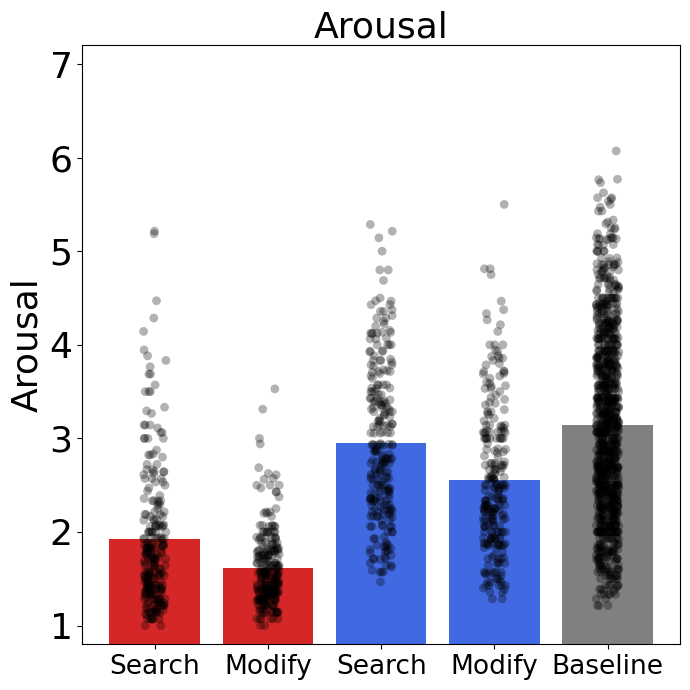

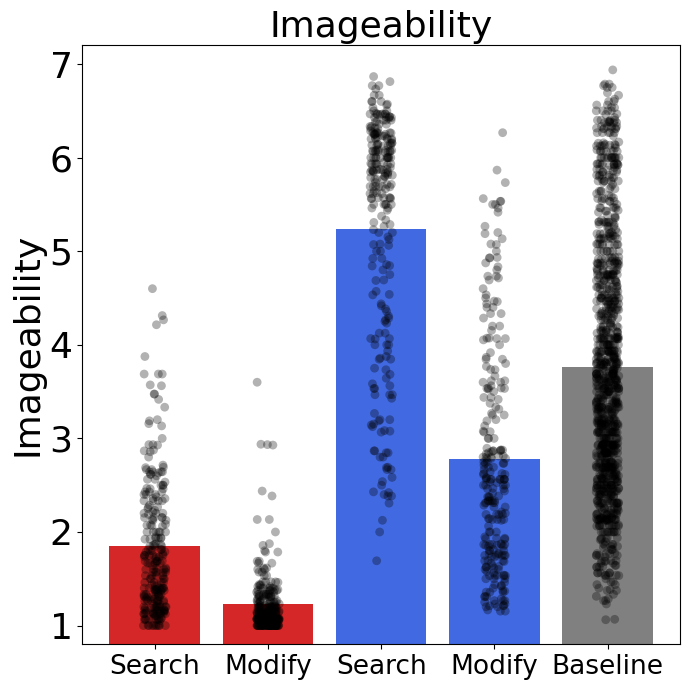

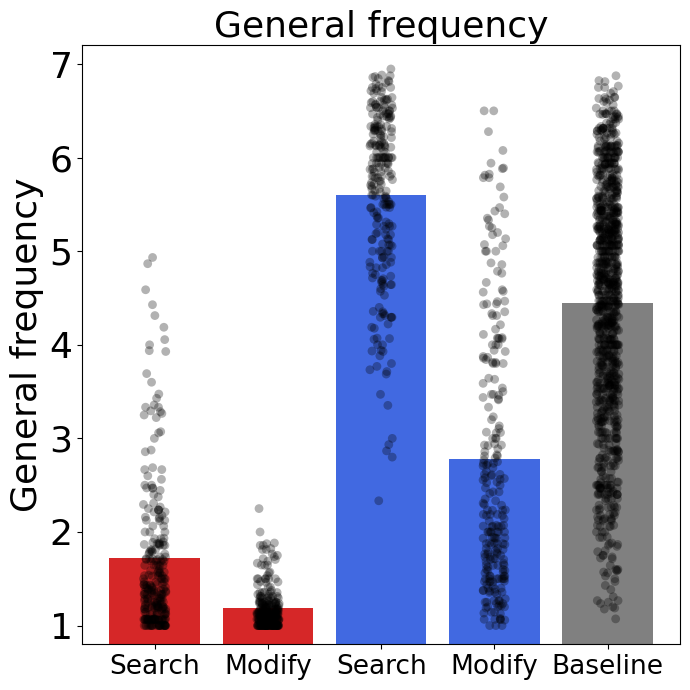

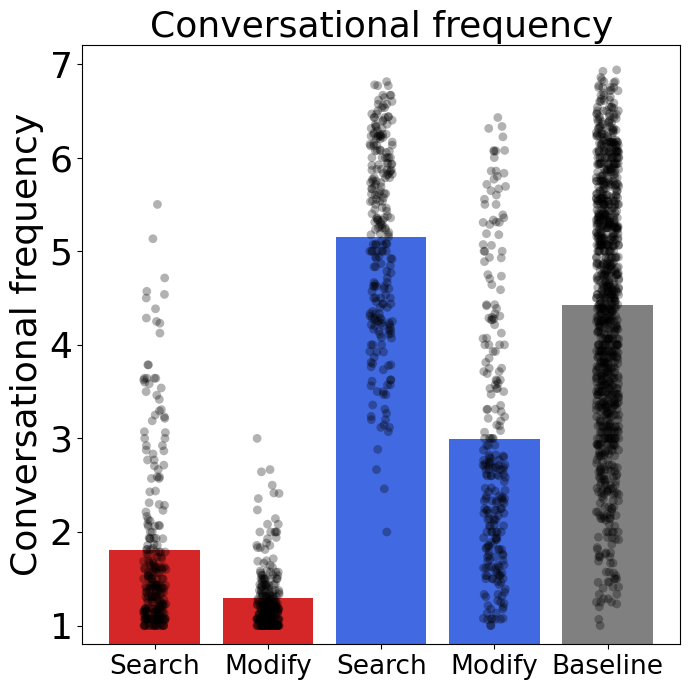

In [57]:
# Create bargraphs of each feature in feats_to_corr (split up using col: cond_approach)
for feat_of_int in feats_of_interest:

    x_val = 'cond_approach'

    if feat_of_int.startswith('rating'):
        ylim = (0.8, 7.2)
    else:
        ylim = None

    # Plot the bargraph
    feature_barplot(df_item_id=df_item_id,
                    x_val=x_val,
                    feat_of_int=feat_of_int,
                    d_colors=d_colors,
                    ylim=ylim,
                    save=save,
                    base_savestr=f'SI_Fig19_{feat_of_int}',
                    PLOTDIR=PLOTDIR, CSVDIR=CSVDIR,)

## SI Figure 20C

Brain responses versus two additional surprisal estimates (5-gram and PCFG).

In [58]:
import matplotlib
import matplotlib.pyplot as plt
from plot_utils import feat_scatter, groupby_coord, get_bin_range, binned_feat

In [59]:
# Constrain to the lang_LH_netw ROI 
df_roi = df.query('roi == "lang_LH_netw"')

feats_of_interest = [
    'log-prob-5gram_mean', 
    'log-prob-pcfg_mean',
    ]



Plotting: feat-scatter_X=log-prob-5gram_mean_Y=response_target_YERR=None_xl=None_yl=-3-3_b-fit=False_a=1_797-841-880-837-856-848-853-865-875-876_SI_Fig20C_log-prob-5gram_mean
Total number of data points across 10 participants: 12500
Min of log-prob-5gram_mean: -5.220652 and max of log-prob-5gram_mean: -1.074240
Min of response_target: -1.403302 and max of response_target: 1.610918


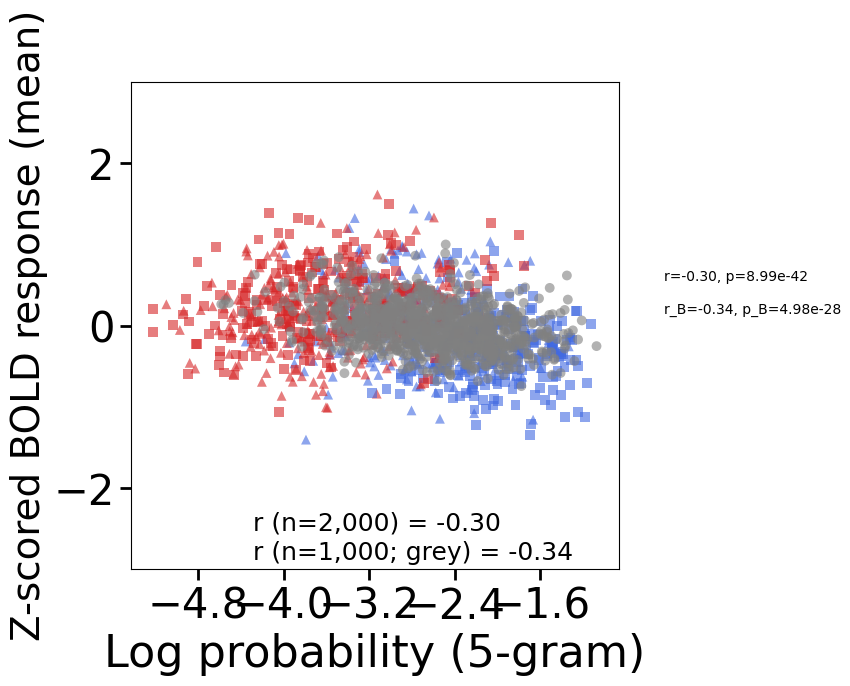



Plotting: feat-scatter_X=log-prob-pcfg_mean_Y=response_target_YERR=None_xl=None_yl=-3-3_b-fit=False_a=1_797-841-880-837-856-848-853-865-875-876_SI_Fig20C_log-prob-pcfg_mean
Total number of data points across 10 participants: 12500
Min of log-prob-pcfg_mean: -19.884067 and max of log-prob-pcfg_mean: -5.613641
Min of response_target: -1.403302 and max of response_target: 1.610918


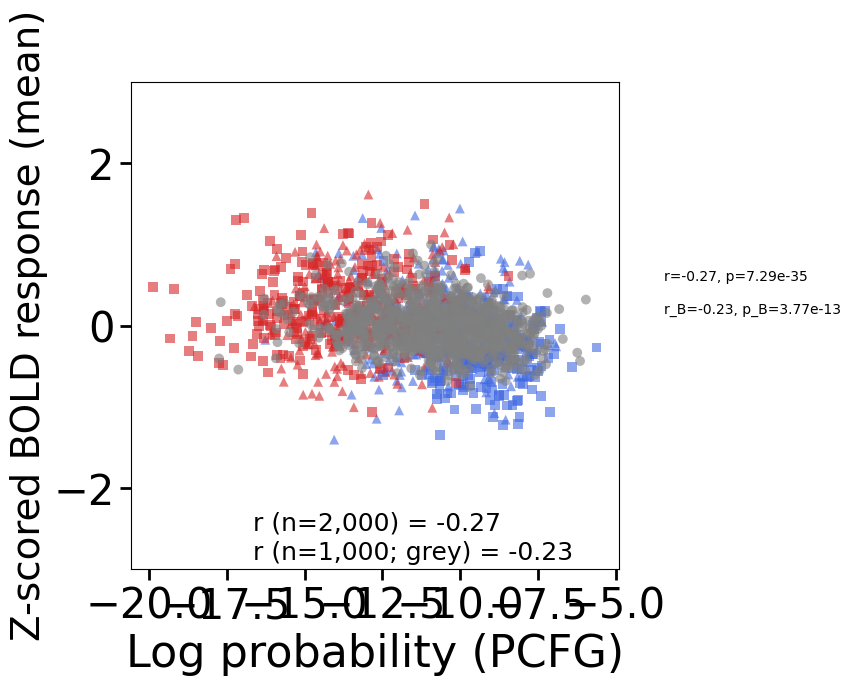

In [60]:
for feat in feats_of_interest:
    if feat.startswith('rating'):
        xlim = [0.5, 7.5]
    elif feat == 'log-prob-gpt2-xl_mean':
        xlim = [-14, -1]
    else:
        xlim = None

    ylim = [-3, 3]

    feat_scatter(df=df_roi,
                 target_UIDs=[str(x) for x in df_roi.target_UID.unique()],
                 x_val=feat,
                 y_val='response_target',
                 xlim=xlim,
                 ylim=ylim,
                 plot_aspect=1,
                 base_savestr=f'SI_Fig20C_{feat}',
                 add_best_fit_line=False,
                 save=save,
                 PLOTDIR=PLOTDIR, CSVDIR=CSVDIR,
                )

Also make the insets:

In [61]:
# Constrain to the lang_LH_netw ROI and average across sentences
df_roi_mean = groupby_coord(df=df.query('roi == "lang_LH_netw"'),
                            coord_col='item_id',
                            aggfunc='mean')

In [62]:
# Generate custom colormap to show how many datapoints we have in each bin
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["whitesmoke", "black"])
norm = plt.Normalize(vmin=0, vmax=1000)
# Package as a tuple and pass to function
cmap_norm = (cmap, norm)

Feature: log-prob-5gram_mean with min: -5.2206518848737 and max: -1.0742402577307 and range: 4.146411627142999 and bin_size: 0.6910686045238332 (total bins: 6)
Number of unique values: 2000
Bin 1 edges: -5.2 - -4.5
Bin 2 edges: -4.5 - -3.8
Bin 3 edges: -3.8 - -3.1
Bin 4 edges: -3.1 - -2.5
Bin 5 edges: -2.5 - -1.8
Bin 6 edges: -1.8 - -1.1
Min number of data points in a bin: 36
Max number of data points in a bin: 659


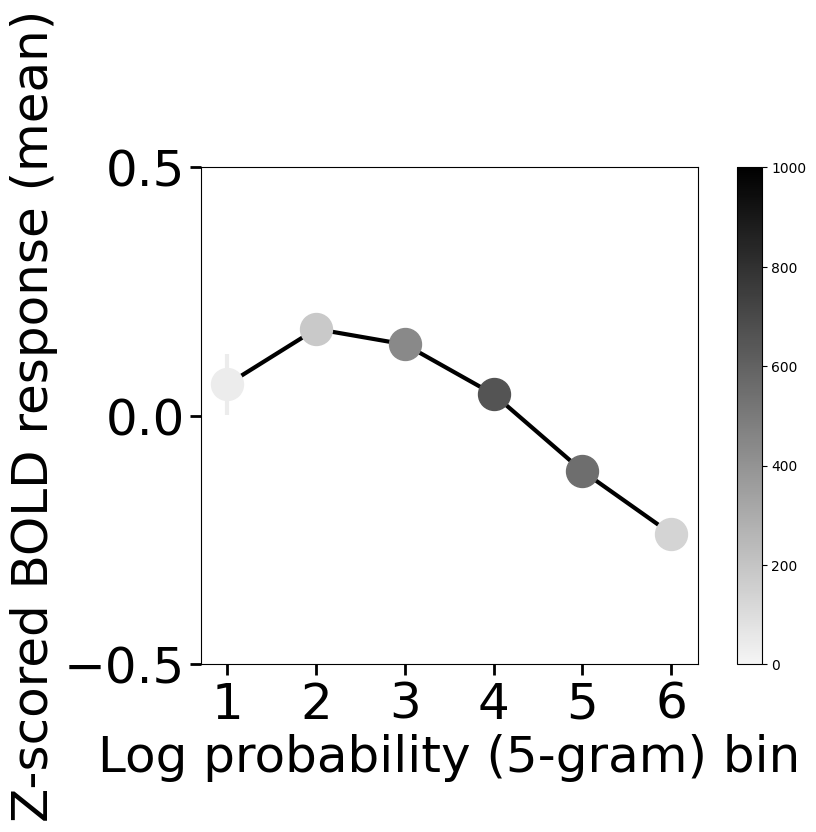

Feature: log-prob-pcfg_mean with min: -19.8840666666667 and max: -5.61364125 and range: 14.2704254166667 and bin_size: 2.3784042361111166 (total bins: 6)
Number of unique values: 2000
Bin 1 edges: -19.9 - -17.5
Bin 2 edges: -17.5 - -15.1
Bin 3 edges: -15.1 - -12.7
Bin 4 edges: -12.7 - -10.4
Bin 5 edges: -10.4 - -8.0
Bin 6 edges: -8.0 - -5.6
Min number of data points in a bin: 14
Max number of data points in a bin: 720


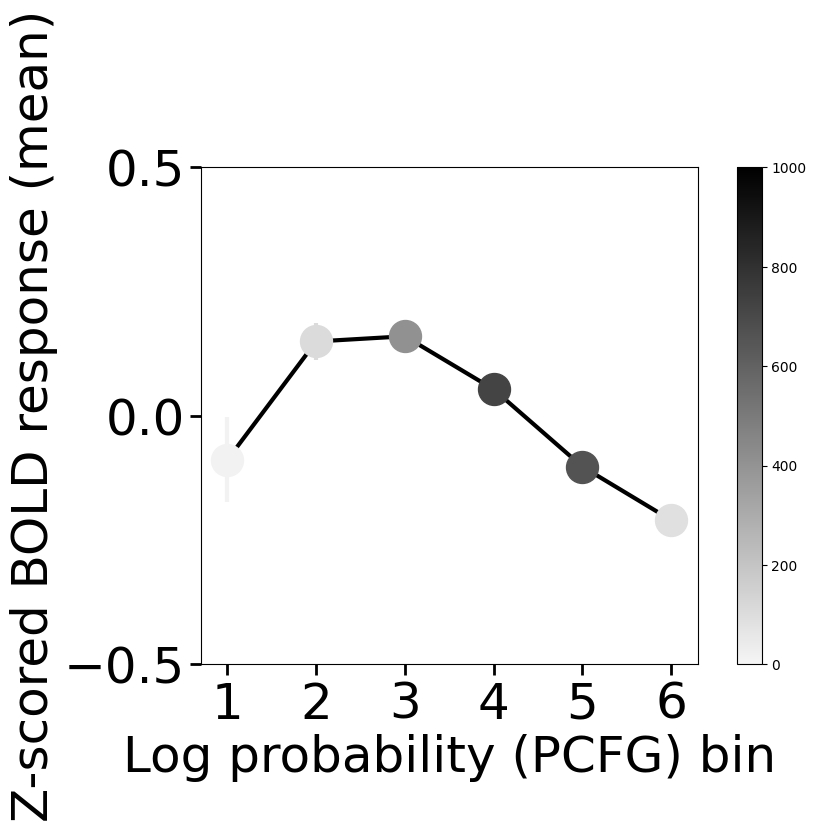

In [63]:
# Loop across features
for feat in feats_of_interest:

    # Bin the feature values
    df_item_bins = df_roi_mean.copy(deep=True)

    enforce_bin_edges = False

    df_item_bins = get_bin_range(df=df_item_bins,
                                 feat=feat,
                                 enforce_bin_edges=enforce_bin_edges,)

    # Plot the nice version without individual points and SEM as error
    df_agg_feat = binned_feat(df=df_item_bins,
                              x_val_feat=feat,
                              y_val='response_target',
                              yerr_type='sem',
                              min_trials=0, # For SI, all datapoints are plotted.
                              plot_aspect=1,
                              ylim=[-0.5,0.5], 
                              ind_points=False,
                              custom_cmap=cmap_norm,
                              save=save,
                              base_savestr=f'SI_Fig20C_inset_{feat}',
                              PLOTDIR=PLOTDIR, CSVDIR=CSVDIR,
                              )

## SI 21

In [64]:
from plot_utils import cond_barplot, groupby_coord
df_all_rois = pd.read_csv('../../data_SI/brain-allroi-data_participant_20231001.csv')

## SI Figure 21A

Correlation of n=10 language fROIs’ responses (5 in the LH, 5 in the RH) with sentence properties (cf. main figures that show all voxels belong to the LH language network).

In [65]:
# Get ROI-level data
rois = ['lang_LH_IFGorb', 'lang_LH_IFG', 'lang_LH_MFG', 'lang_LH_AntTemp', 'lang_LH_PostTemp',
        'lang_RH_IFGorb', 'lang_RH_IFG', 'lang_RH_MFG', 'lang_RH_AntTemp', 'lang_RH_PostTemp', ]

feats_of_interest = [
    'log-prob-gpt2-xl_mean',
    'rating_gram_mean',
    'rating_sense_mean',

    'rating_others_thoughts_mean',
    'rating_physical_mean',
    'rating_places_mean',

    'rating_valence_mean',
    'rating_arousal_mean',

    'rating_imageability_mean',

    'rating_frequency_mean',
    'rating_conversational_mean',
]

In [67]:
# Constrain to our rois of interest (defined above)
df_all_subset = df_all_rois.loc[df_all_rois['roi'].isin(rois)]
df_all_subset_B = df_all_subset.loc[df_all_subset['cond'] == 'B'] # Constrain to baseline sentences
# df_all_subset_B has the following number of rows: (10 ROIs * 1000 sentences * 9 participants) + (10 ROIs * 988 sentences * 1 participant)

# Fetch sentence properties
df_lang_B = df.loc[df['cond'] == 'B'] # The main dataframe has all the sentence properties. Constrain to baseline sentences.
df_lang_B_grouped = groupby_coord(df=df_lang_B, # Obtain sentence properties for each item (of course, they are the same for each item. This is just a way of obtaining one per item)
                                  coord_col='item_id',
                                  aggfunc='mean', )

In [71]:
for roi in rois:
    # Average over neural data (for each ROI)
    df_all_subset_B_grouped = groupby_coord(df=df_all_subset_B.loc[df_all_subset_B['roi'] == roi],
                                          coord_col='item_id',
                                          aggfunc='mean',)

    # Append the sentence properties
    df_concat = pd.concat([df_all_subset_B_grouped, df_lang_B_grouped[feats_of_interest]], axis=1)

    df_corr = df_concat.corr()

    print(f'\nROI: {roi}') 
    print(df_corr.loc[feats_of_interest, 'response_target']) # Contains the correlation values of a given property with the average neural response


ROI: lang_LH_IFGorb
log-prob-gpt2-xl_mean         -0.225360
rating_gram_mean              -0.305240
rating_sense_mean             -0.339739
rating_others_thoughts_mean    0.002710
rating_physical_mean          -0.195913
rating_places_mean            -0.178178
rating_valence_mean           -0.143190
rating_arousal_mean            0.017239
rating_imageability_mean      -0.244044
rating_frequency_mean         -0.356221
rating_conversational_mean    -0.276128
Name: response_target, dtype: float64

ROI: lang_LH_IFG
log-prob-gpt2-xl_mean         -0.286665
rating_gram_mean              -0.380093
rating_sense_mean             -0.420785
rating_others_thoughts_mean   -0.122030
rating_physical_mean          -0.137044
rating_places_mean            -0.136812
rating_valence_mean           -0.135426
rating_arousal_mean           -0.092532
rating_imageability_mean      -0.226275
rating_frequency_mean         -0.438984
rating_conversational_mean    -0.357115
Name: response_target, dtype: float64

ROI:

## SI 21B

Correlation of responses in n=28 anatomical Glasser parcels (18 in the LH, 10 in the RH) that are located in language-responsive areas with 11 sentence properties.

In [72]:
rois_anat = ["anatglasser_LH_47l", "anatglasser_LH_45", "anatglasser_LH_IFSp", "anatglasser_LH_IFJa", 
        "anatglasser_LH_44", "anatglasser_LH_FEF", "anatglasser_LH_55b", "anatglasser_LH_STSva", 
        "anatglasser_LH_STSda", "anatglasser_LH_STGa", "anatglasser_LH_A5", "anatglasser_LH_TPOJ2", 
        "anatglasser_LH_TPOJ1", "anatglasser_LH_STV", "anatglasser_LH_STSvp", "anatglasser_LH_STSdp", 
        "anatglasser_LH_PSL", "anatglasser_LH_PHT", "anatglasser_RH_47l", "anatglasser_RH_IFSp", 
        "anatglasser_RH_IFJa", "anatglasser_RH_STSda", "anatglasser_RH_STGa", "anatglasser_RH_PI", 
        "anatglasser_RH_TPOJ2", "anatglasser_RH_TPOJ1", "anatglasser_RH_STSdp", "anatglasser_RH_PHT"]

In [73]:
df_all_subset_anat = df_all_rois.loc[df_all_rois['roi'].isin(rois_anat)]
df_all_subset_B_anat = df_all_subset_anat.loc[df_all_subset_anat['cond'] == 'B']

# Fetch sentence properties
df_lang_B = df.loc[df['cond'] == 'B'] # The main dataframe has all the sentence properties. Constrain to baseline sentences.
df_lang_B_grouped = groupby_coord(df=df_lang_B, # Obtain sentence properties for each item
                                  coord_col='item_id',
                                  aggfunc='mean', )

In [74]:
for roi in rois_anat:
    # Average over neural data (for each ROI)
    df_all_subset_B_grouped = groupby_coord(df=df_all_subset_B_anat.loc[df_all_subset_B_anat['roi'] == roi],
                                          coord_col='item_id',
                                          aggfunc='mean',)

    # Append the sentence properties
    df_concat = pd.concat([df_all_subset_B_grouped, df_lang_B_grouped[feats_of_interest]], axis=1)

    df_corr = df_concat.corr()

    print(f'\nROI: {roi}') 
    print(df_corr.loc[feats_of_interest, 'response_target']) # Contains the correlation values of a given property with the average neural response


ROI: anatglasser_LH_47l
log-prob-gpt2-xl_mean         -0.149519
rating_gram_mean              -0.149857
rating_sense_mean             -0.191492
rating_others_thoughts_mean    0.024493
rating_physical_mean          -0.103244
rating_places_mean            -0.100312
rating_valence_mean           -0.073007
rating_arousal_mean            0.045040
rating_imageability_mean      -0.124181
rating_frequency_mean         -0.224951
rating_conversational_mean    -0.129327
Name: response_target, dtype: float64

ROI: anatglasser_LH_45
log-prob-gpt2-xl_mean         -0.163777
rating_gram_mean              -0.206042
rating_sense_mean             -0.240879
rating_others_thoughts_mean    0.065812
rating_physical_mean          -0.145703
rating_places_mean            -0.157065
rating_valence_mean           -0.135046
rating_arousal_mean            0.059851
rating_imageability_mean      -0.160509
rating_frequency_mean         -0.253268
rating_conversational_mean    -0.175252
Name: response_target, dtype: flo

## SI Figure 24

Statistical differences between the BOLD response for pairs of sentence property bins for each of 11 sentence properties (the bin inset plots in Figure 5C, main text).
Obs: requires statsmodels Python module (not a part of the core drive-suppress environment).

In [2]:
from plot_utils import binned_feat_pairwise_stats, get_bin_range, groupby_coord

feats_of_interest = [
    'log-prob-gpt2-xl_mean',
    'rating_gram_mean',
    'rating_sense_mean',

    'rating_others_thoughts_mean',
    'rating_physical_mean',
    'rating_places_mean',

    'rating_valence_mean',
    'rating_arousal_mean',

    'rating_imageability_mean',

    'rating_frequency_mean',
    'rating_conversational_mean',
]

In [3]:
# Constrain to the lang_LH_netw ROI and average across sentences
df_roi_mean = groupby_coord(df=df.query('roi == "lang_LH_netw"'),
                            coord_col='item_id',
                            aggfunc='mean')

Feature: log-prob-gpt2-xl_mean with min: -13.140351 and max: -1.9329304 and range: 11.2074206 and bin_size: 1.8679034333333335 (total bins: 6)
Number of unique values: 2000
Bin 1 edges: -13.1 - -11.3
Bin 2 edges: -11.3 - -9.4
Bin 3 edges: -9.4 - -7.5
Bin 4 edges: -7.5 - -5.7
Bin 5 edges: -5.7 - -3.8
Bin 6 edges: -3.8 - -1.9
Number of bins with less than 20 trials: 1. Dropping these bins: [1.]


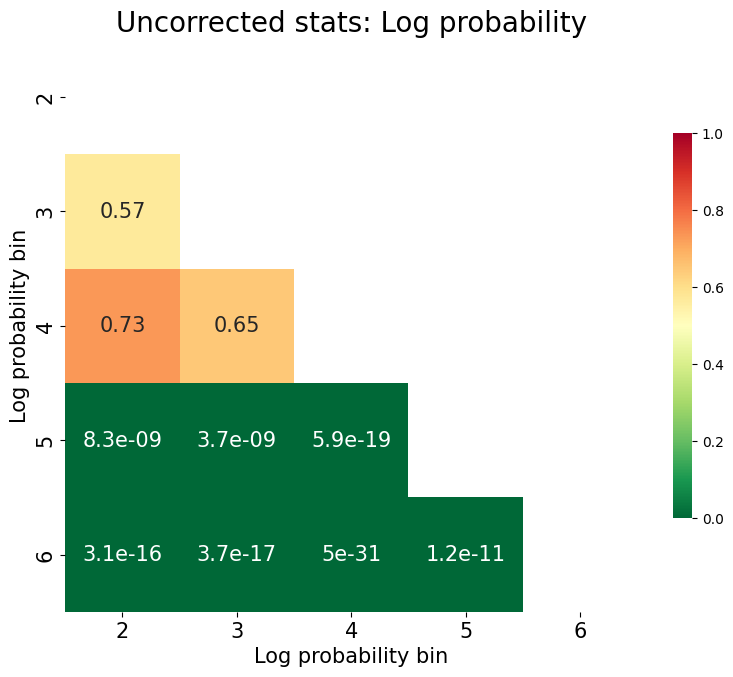

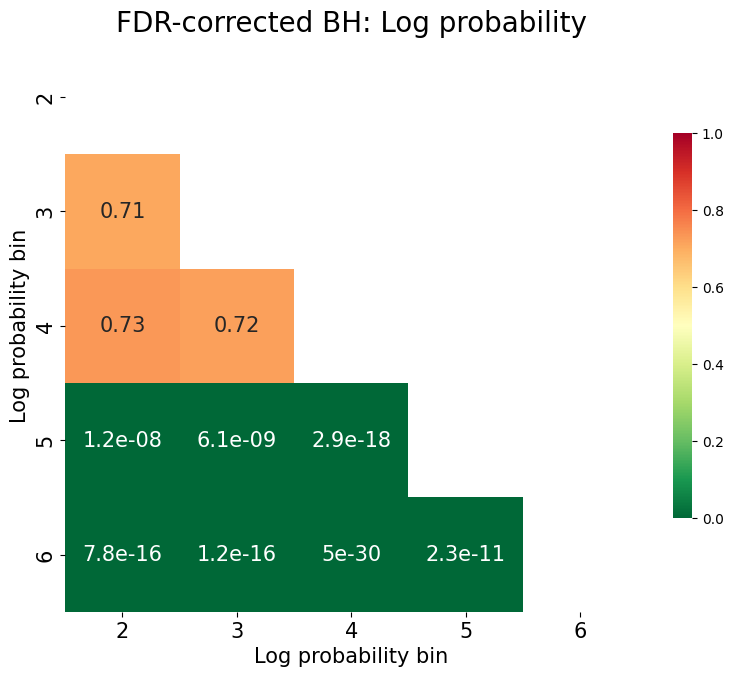

Feature: rating_gram_mean with min: 1 and max: 7 and range: 6 and bin_size: 1.0 (total bins: 6)
Number of unique values: 497
Bin 1 edges: 1.0 - 2.0
Bin 2 edges: 2.0 - 3.0
Bin 3 edges: 3.0 - 4.0
Bin 4 edges: 4.0 - 5.0
Bin 5 edges: 5.0 - 6.0
Bin 6 edges: 6.0 - 7.0


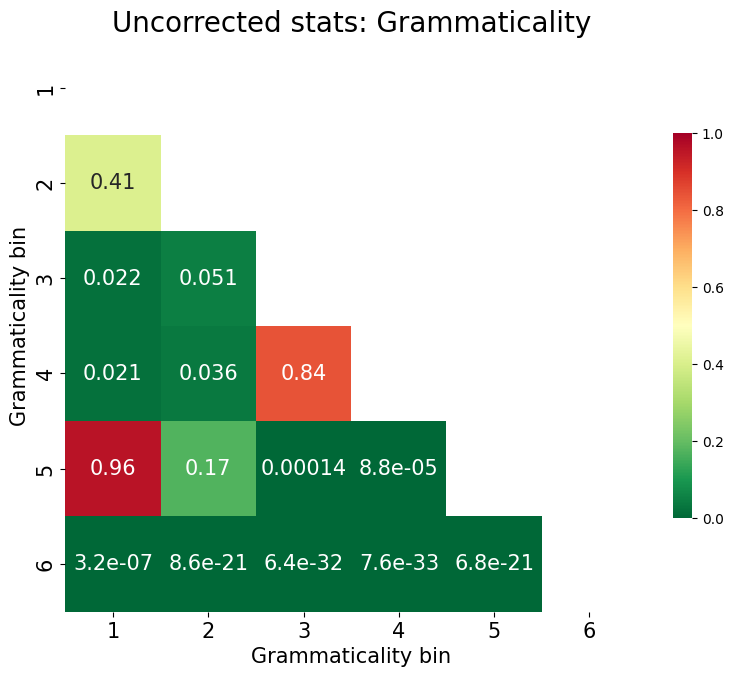

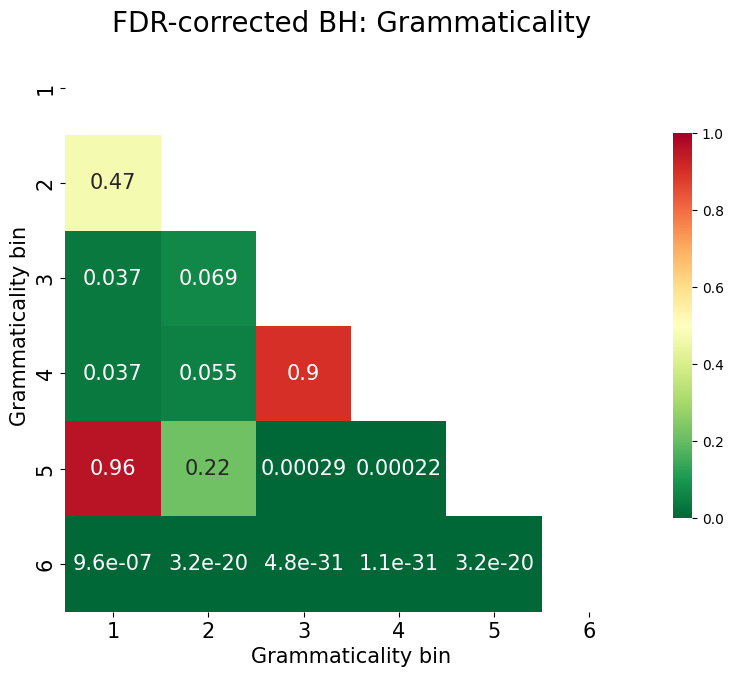

Feature: rating_sense_mean with min: 1 and max: 7 and range: 6 and bin_size: 1.0 (total bins: 6)
Number of unique values: 501
Bin 1 edges: 1.0 - 2.0
Bin 2 edges: 2.0 - 3.0
Bin 3 edges: 3.0 - 4.0
Bin 4 edges: 4.0 - 5.0
Bin 5 edges: 5.0 - 6.0
Bin 6 edges: 6.0 - 7.0


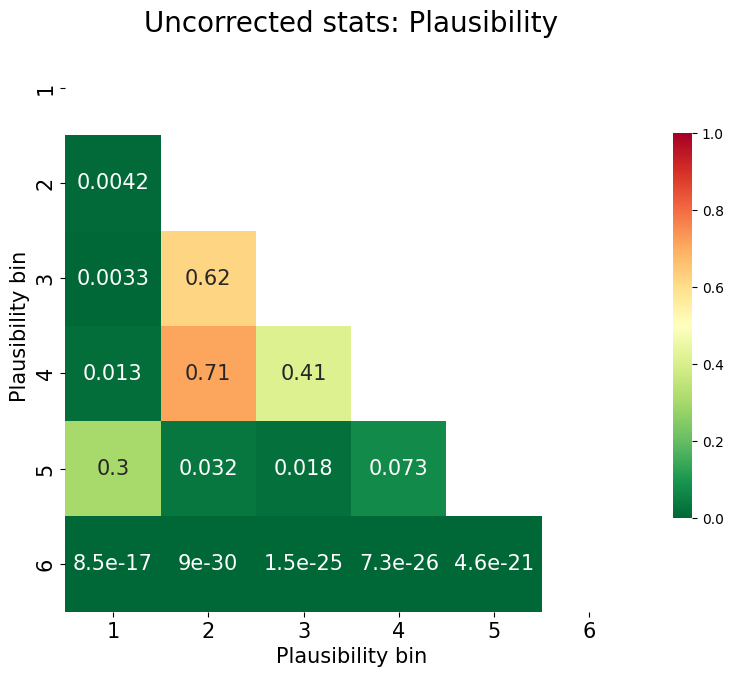

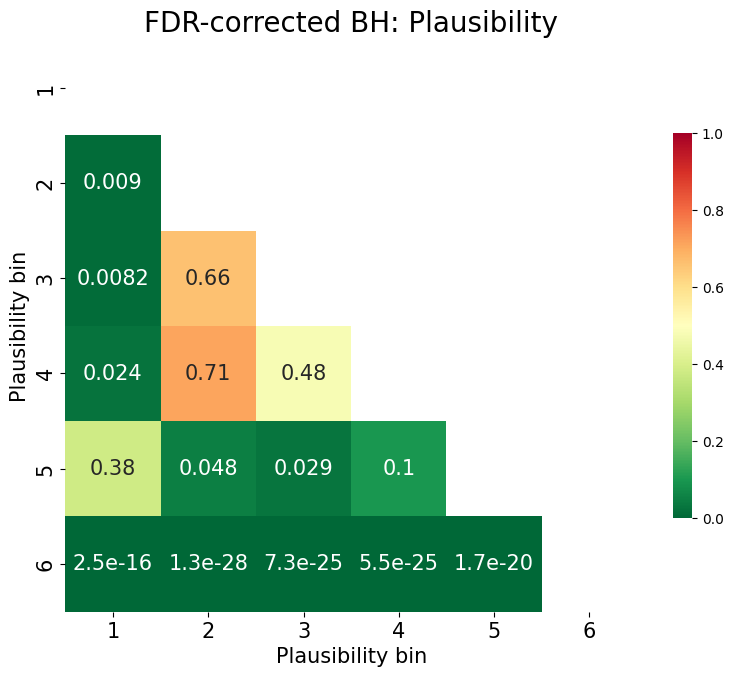

Feature: rating_others_thoughts_mean with min: 1 and max: 7 and range: 6 and bin_size: 1.0 (total bins: 6)
Number of unique values: 539
Bin 1 edges: 1.0 - 2.0
Bin 2 edges: 2.0 - 3.0
Bin 3 edges: 3.0 - 4.0
Bin 4 edges: 4.0 - 5.0
Bin 5 edges: 5.0 - 6.0
Bin 6 edges: 6.0 - 7.0


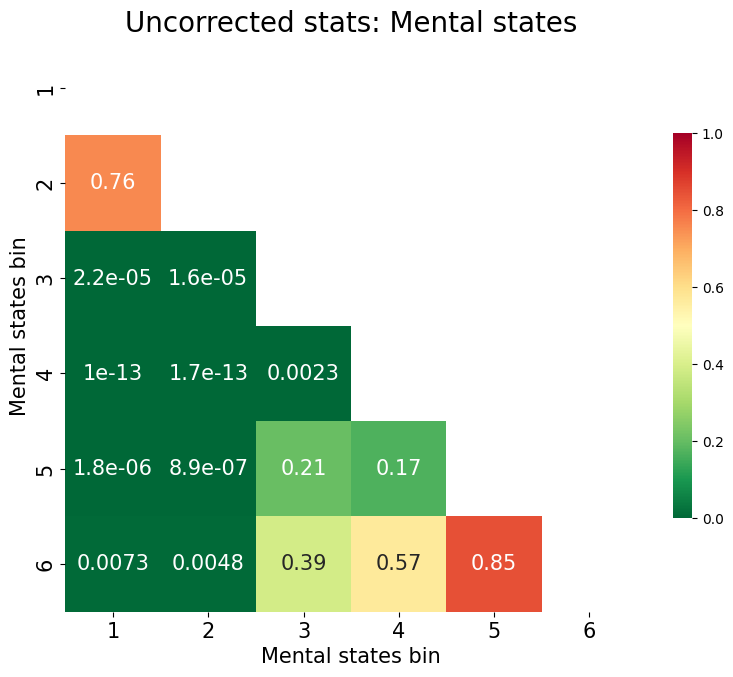

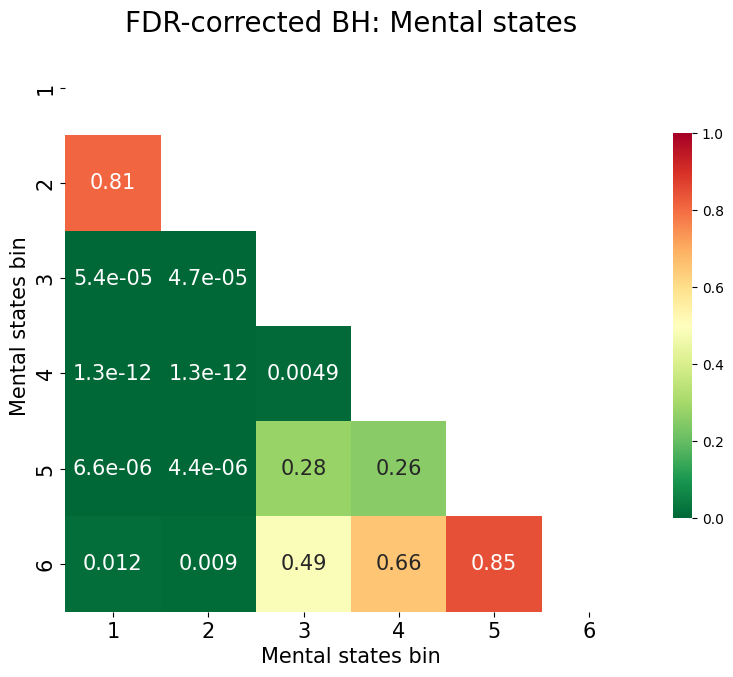

Feature: rating_physical_mean with min: 1 and max: 7 and range: 6 and bin_size: 1.0 (total bins: 6)
Number of unique values: 526
Bin 1 edges: 1.0 - 2.0
Bin 2 edges: 2.0 - 3.0
Bin 3 edges: 3.0 - 4.0
Bin 4 edges: 4.0 - 5.0
Bin 5 edges: 5.0 - 6.0
Bin 6 edges: 6.0 - 7.0


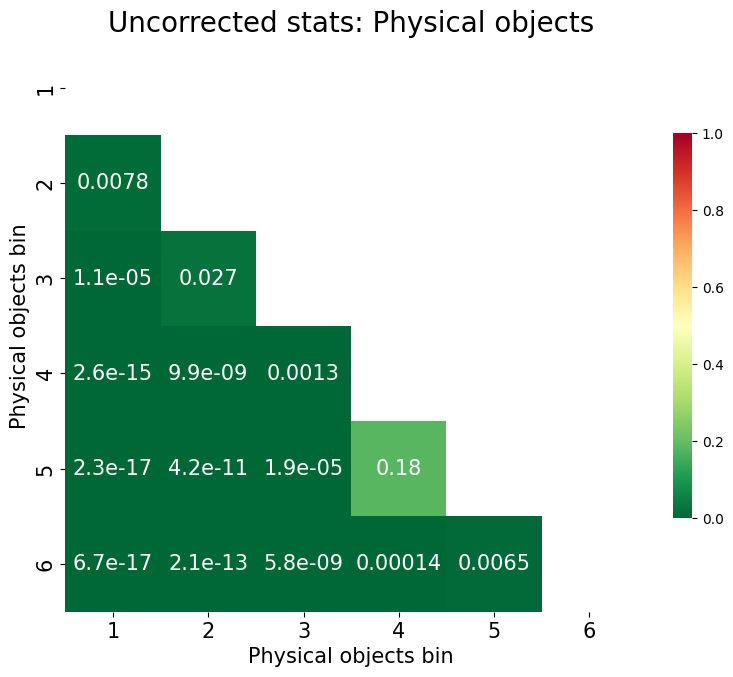

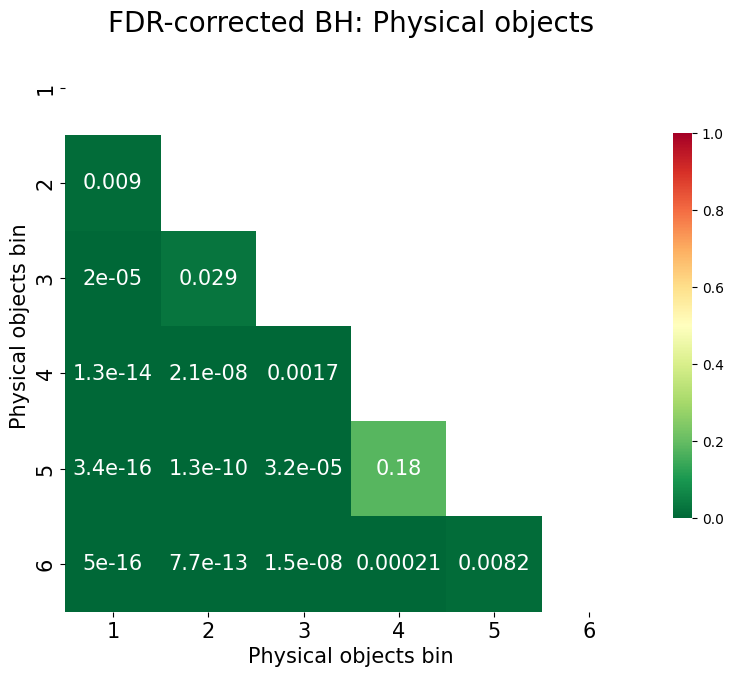

Feature: rating_places_mean with min: 1 and max: 7 and range: 6 and bin_size: 1.0 (total bins: 6)
Number of unique values: 435
Bin 1 edges: 1.0 - 2.0
Bin 2 edges: 2.0 - 3.0
Bin 3 edges: 3.0 - 4.0
Bin 4 edges: 4.0 - 5.0
Bin 5 edges: 5.0 - 6.0
Bin 6 edges: 6.0 - 7.0


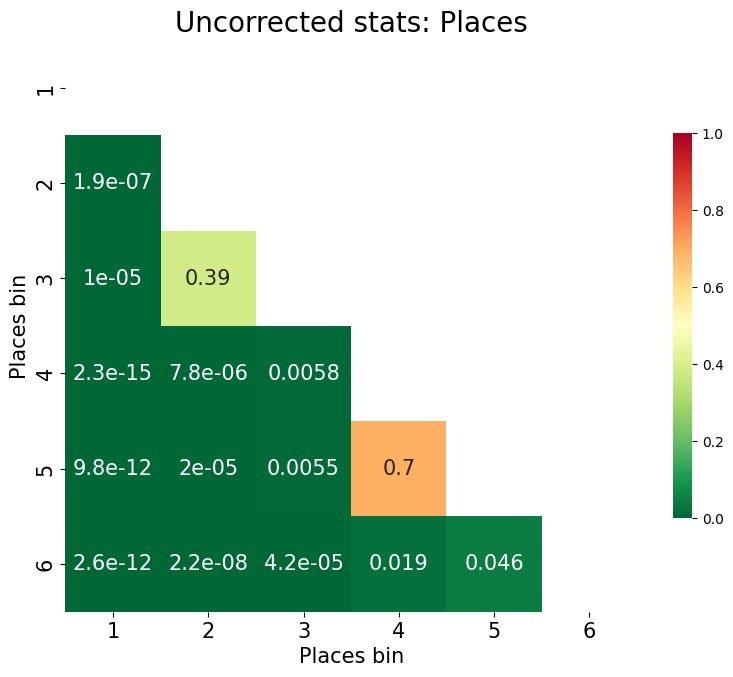

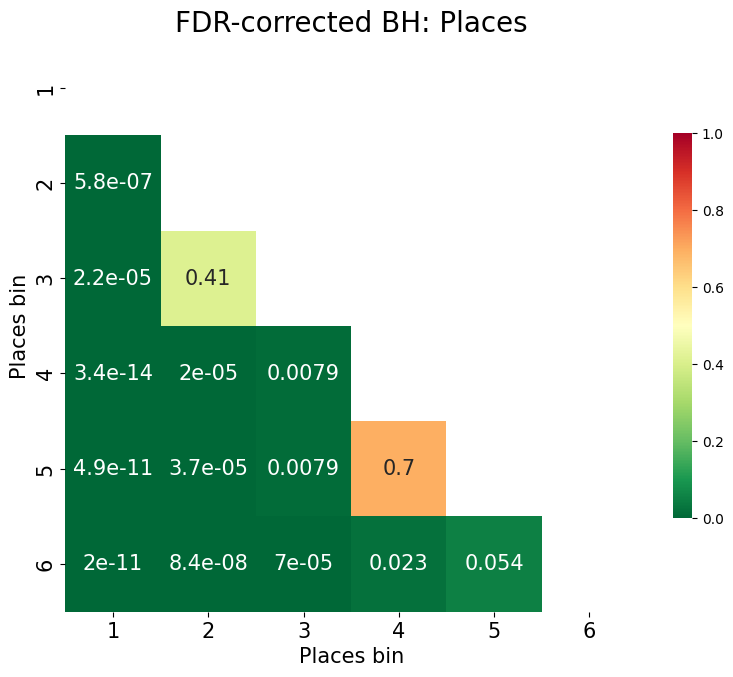

Feature: rating_valence_mean with min: 1 and max: 7 and range: 6 and bin_size: 1.0 (total bins: 6)
Number of unique values: 578
Bin 1 edges: 1.0 - 2.0
Bin 2 edges: 2.0 - 3.0
Bin 3 edges: 3.0 - 4.0
Bin 4 edges: 4.0 - 5.0
Bin 5 edges: 5.0 - 6.0
Bin 6 edges: 6.0 - 7.0


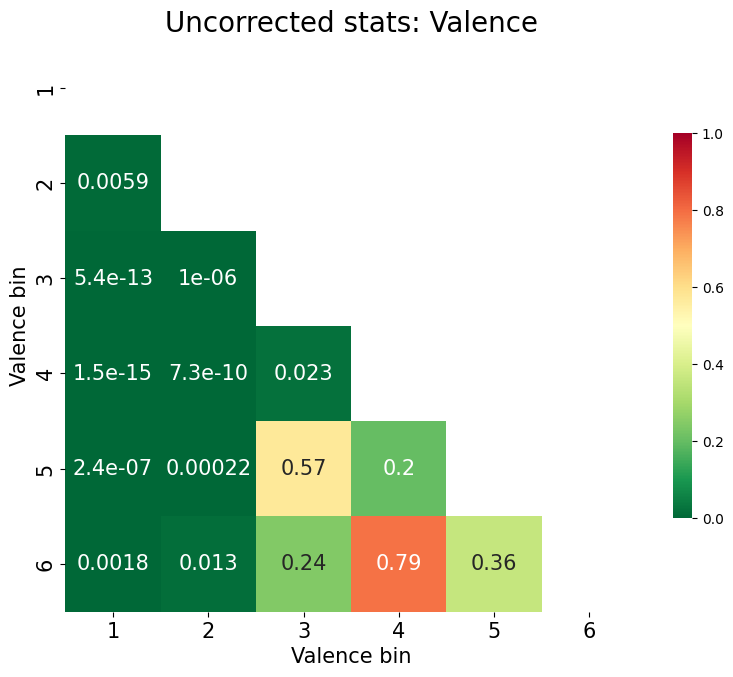

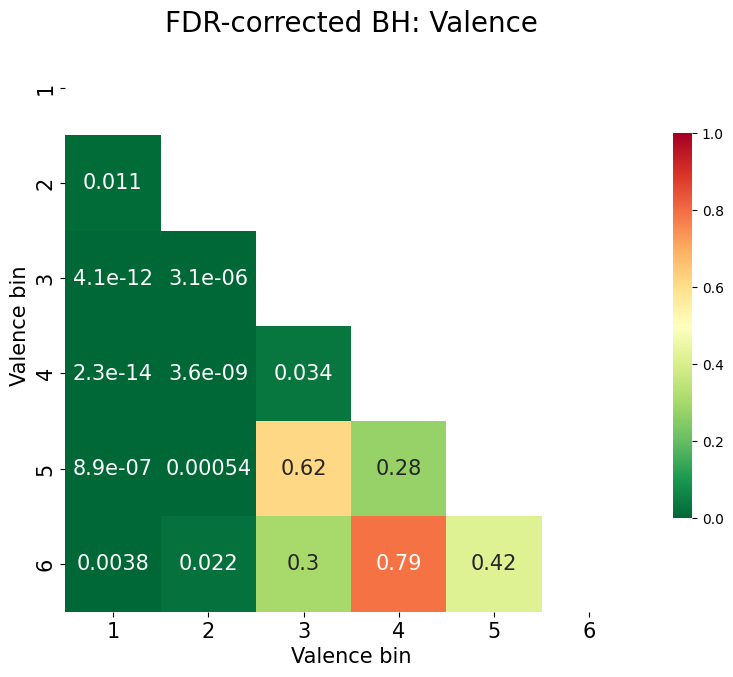

Feature: rating_arousal_mean with min: 1 and max: 7 and range: 6 and bin_size: 1.0 (total bins: 6)
Number of unique values: 442
Bin 1 edges: 1.0 - 2.0
Bin 2 edges: 2.0 - 3.0
Bin 3 edges: 3.0 - 4.0
Bin 4 edges: 4.0 - 5.0
Bin 5 edges: 5.0 - 6.0
Bin 6 edges: 6.0 - 7.0
Number of bins with less than 20 trials: 1. Dropping these bins: [6.]


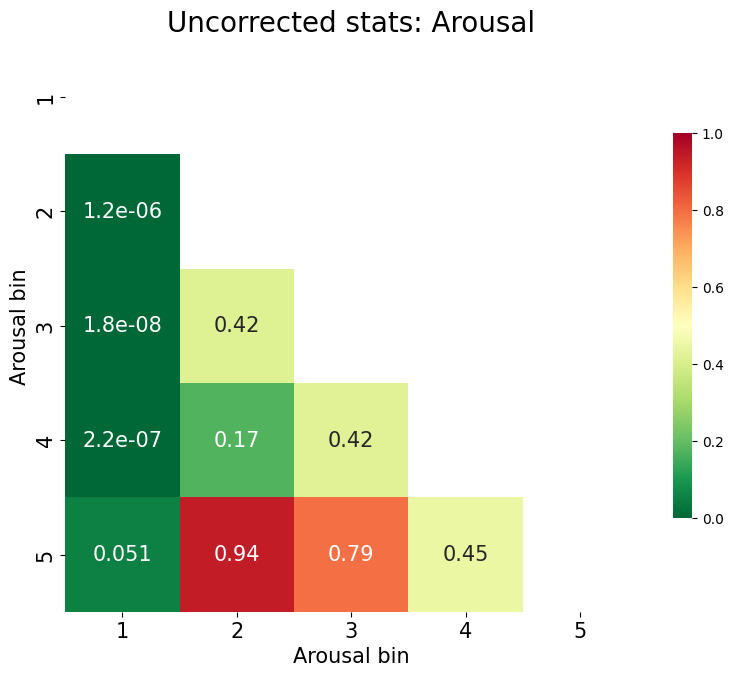

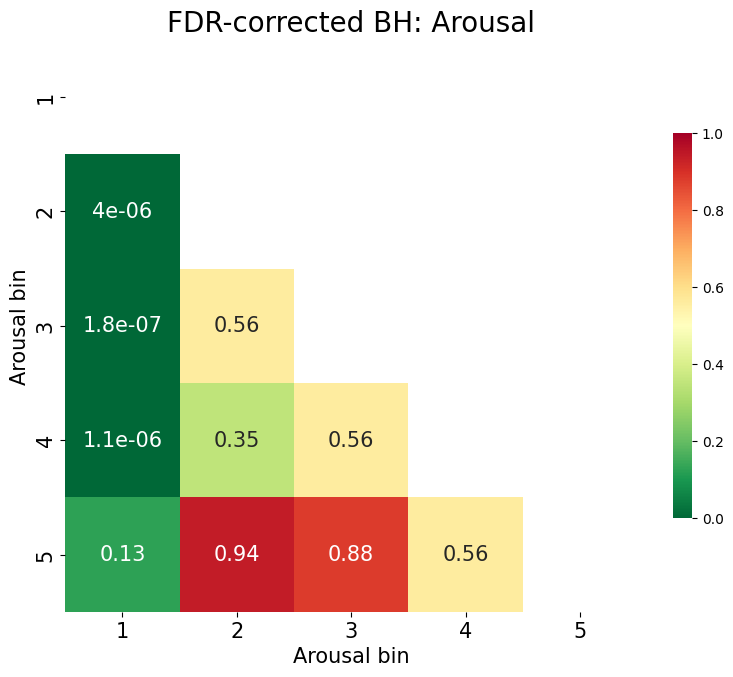

Feature: rating_imageability_mean with min: 1 and max: 7 and range: 6 and bin_size: 1.0 (total bins: 6)
Number of unique values: 512
Bin 1 edges: 1.0 - 2.0
Bin 2 edges: 2.0 - 3.0
Bin 3 edges: 3.0 - 4.0
Bin 4 edges: 4.0 - 5.0
Bin 5 edges: 5.0 - 6.0
Bin 6 edges: 6.0 - 7.0


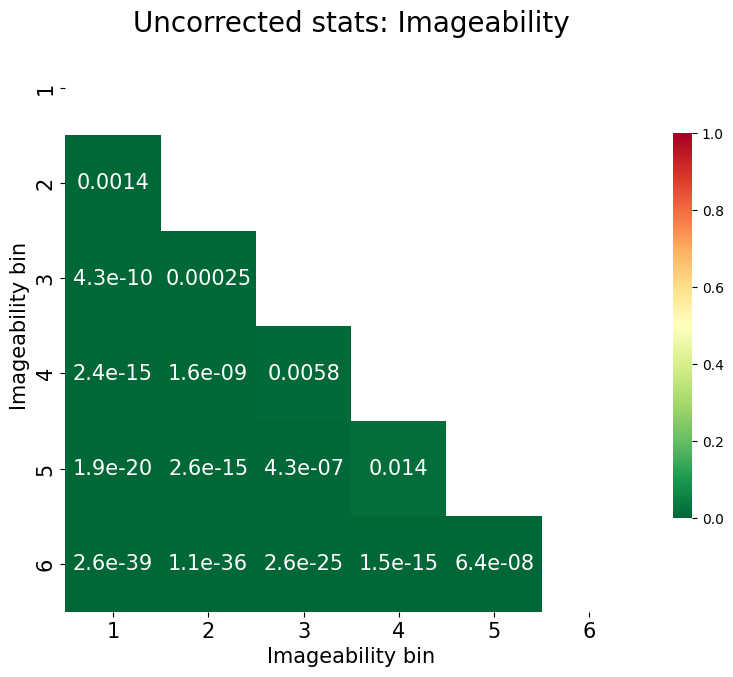

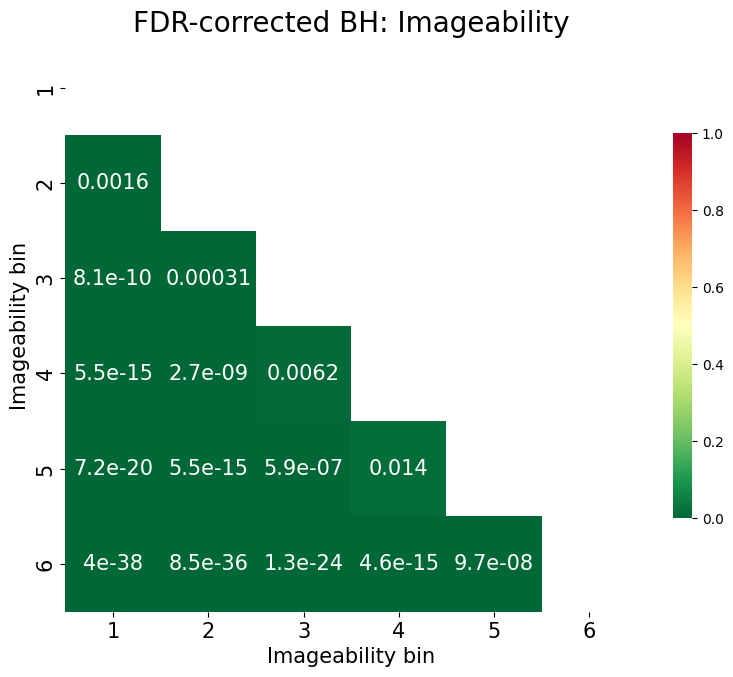

Feature: rating_frequency_mean with min: 1 and max: 7 and range: 6 and bin_size: 1.0 (total bins: 6)
Number of unique values: 627
Bin 1 edges: 1.0 - 2.0
Bin 2 edges: 2.0 - 3.0
Bin 3 edges: 3.0 - 4.0
Bin 4 edges: 4.0 - 5.0
Bin 5 edges: 5.0 - 6.0
Bin 6 edges: 6.0 - 7.0


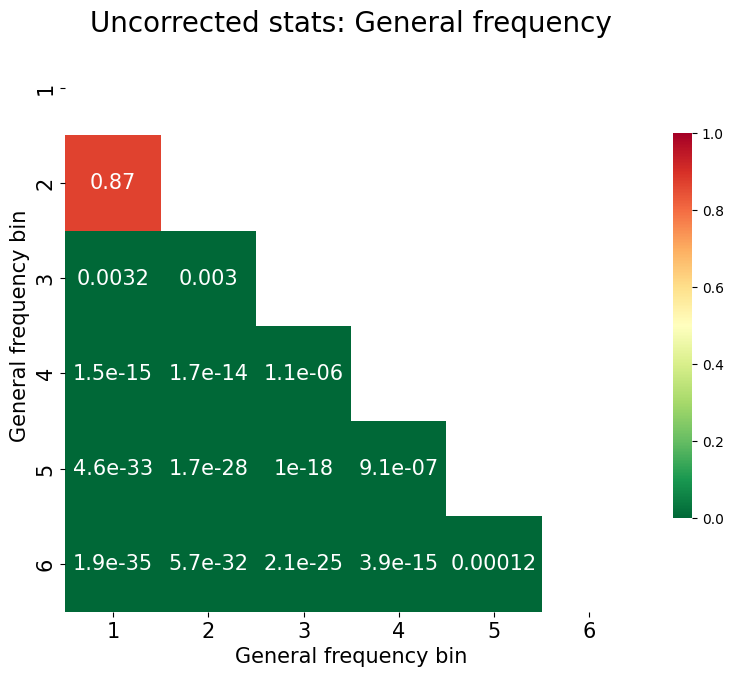

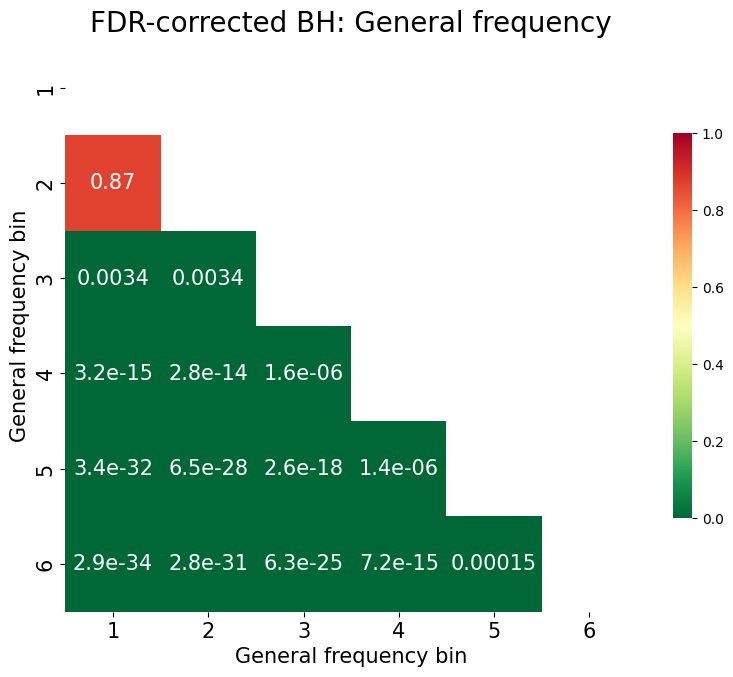

Feature: rating_conversational_mean with min: 1 and max: 7 and range: 6 and bin_size: 1.0 (total bins: 6)
Number of unique values: 598
Bin 1 edges: 1.0 - 2.0
Bin 2 edges: 2.0 - 3.0
Bin 3 edges: 3.0 - 4.0
Bin 4 edges: 4.0 - 5.0
Bin 5 edges: 5.0 - 6.0
Bin 6 edges: 6.0 - 7.0


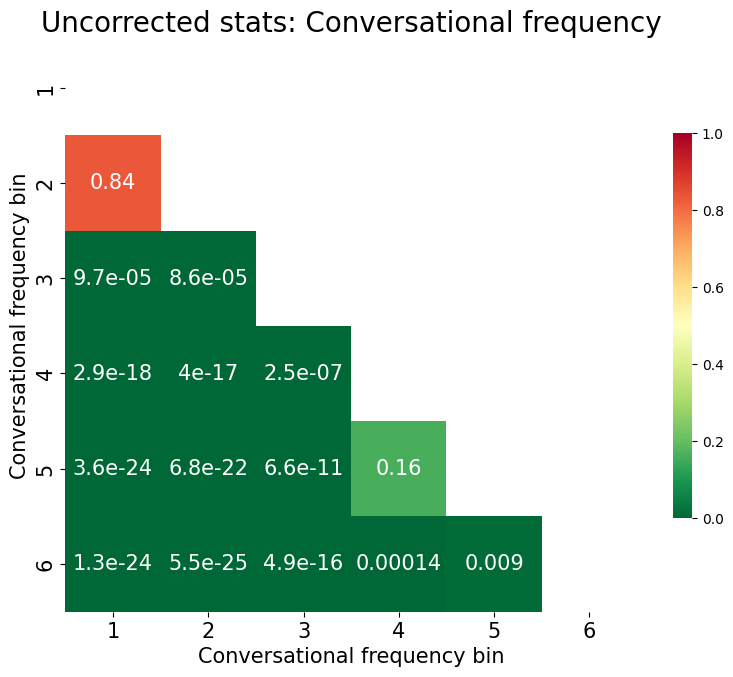

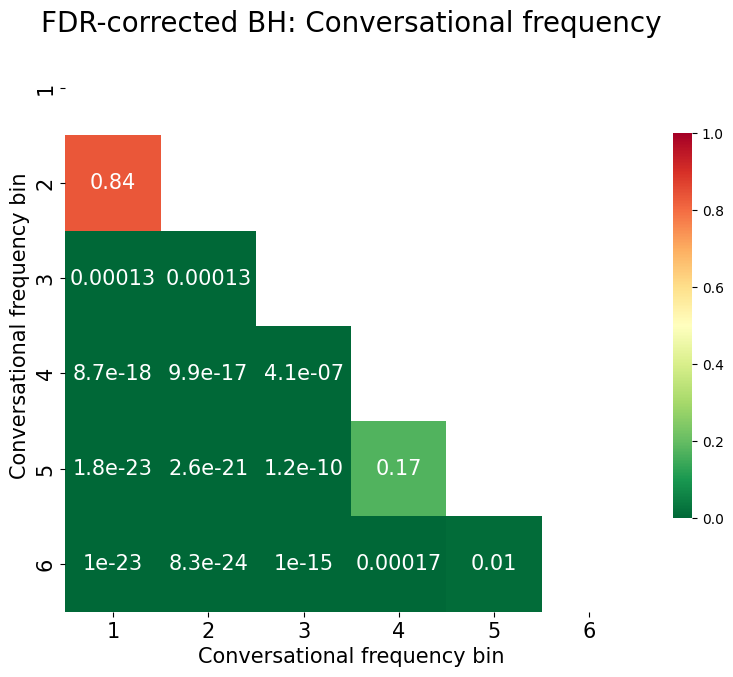

In [4]:
# Loop across features
for feat in feats_of_interest:

    # Bin the feature values
    df_item_bins = df_roi_mean.copy(deep=True)

    if feat.startswith('rating'):
        enforce_bin_edges = True # Ratings are in nice bins according to the Likert 7-point scale, so we want bins that go from 1-2, 2-3 etc.
    else:
        enforce_bin_edges = False

    df_item_bins = get_bin_range(df=df_item_bins,
                                 feat=feat,
                                 enforce_bin_edges=enforce_bin_edges,)

    # Run pairwise statistics
    binned_feat_pairwise_stats(df=df_item_bins,
                              x_val_feat=feat,
                              y_val='response_target',
                              min_trials=20,
                              save=save,
                              base_savestr=f'SI_Fig24_{feat}',
                              PLOTDIR=PLOTDIR, CSVDIR=CSVDIR,
                              )